# Name - Harsh Vardhan 
# sec--CSE 3
# enrollment - 240467


# STEP 1


# Project Title: Analysis of Air Pollution Drivers and Health Impacts in New York City

# Objective: To systematically analyze the spatial and temporal patterns of major air pollutants (PM2.5, NO₂, O₃) in New York City and assess their relationship with potential emission sources (vehicle traffic, boiler emissions) and public health outcomes (asthma, respiratory deaths).

# Specific Goals:

Segregate & Clean: Separate the raw dataset into three distinct analytical groups: Air Pollutants, Emission Sources, and Health Outcomes.

Trend Analysis: Identify seasonal and annual trends in PM2.5, NO2, and Ozone levels across NYC boroughs.

Correlation Analysis: Explore the link between vehicle traffic density (annual vehicle miles) and pollutant concentrations in different neighborhoods.

Predictive Modeling: Build a regression model to predict PM2.5 levels based on location and time of year.

# SOURCE 

data set download link - https://data.cityofnewyork.us/api/views/c3uy-2p5r/rows.csv?accessType=DOWNLOAD

# AIR QUALITY INDEX DATA FROM data.gov been taken

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [56]:
# loading data file 
df = pd.read_csv("Air_Quality.csv")

# Display first few rows
print("FIRST 5 ROWS OF DATA:")
display(df.head(), "\n")


FIRST 5 ROWS OF DATA:


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,NaN


'\n'

In [57]:
# Dataset Shape
print("DATASET SHAPE:")
display("Rows:", df.shape[0])
display("Columns:", df.shape[1])


DATASET SHAPE:


'Rows:'

18862

'Columns:'

12

In [58]:
# List of columns
print("COLUMN NAMES:")
display(df.columns.tolist(), "\n")

COLUMN NAMES:


['Unique ID',
 'Indicator ID',
 'Name',
 'Measure',
 'Measure Info',
 'Geo Type Name',
 'Geo Join ID',
 'Geo Place Name',
 'Time Period',
 'Start_Date',
 'Data Value',
 'Message']

'\n'

In [59]:
# Data types of each column

print("DATA TYPES:")
print(df.dtypes, "\n")

DATA TYPES:
Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID         int64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object 



In [60]:
# Summary statistics for numerical columns
print("SUMMARY STATISTICS FOR NUMERIC COLUMNS:")
print(df.describe(), "\n")


SUMMARY STATISTICS FOR NUMERIC COLUMNS:
           Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   18862.000000  18862.000000  1.886200e+04  18862.000000      0.0
mean   452004.167533    431.817888  5.983262e+05     21.051580      NaN
std    262910.731230    113.946565  7.819721e+06     23.564920      NaN
min    130355.000000    365.000000  1.000000e+00      0.000000      NaN
25%    176073.250000    365.000000  2.020000e+02      8.742004      NaN
50%    412490.500000    375.000000  3.030000e+02     14.790000      NaN
75%    669588.750000    386.000000  4.040000e+02     26.267500      NaN
max    878254.000000    661.000000  1.051061e+08    424.700000      NaN 



# Numerical Variables: These represent quantities that can be measured or counted. You can perform mathematical operations on them, like calculating an average (mean) or median.

Examples: Age, Temperature, Price, or your Data Value column.

# Categorical Variables: These represent groups, labels, or categories. You can't do math on them, but you can count their occurrences.

Examples: Gender (Male/Female), a City Name, or your Geo Place Name column.

In [61]:
# Numerical variables
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
display(numerical)

['Unique ID', 'Indicator ID', 'Geo Join ID', 'Data Value', 'Message']

In [62]:
# Categorical variables
categorical = df.select_dtypes(include=['object']).columns.tolist()
display(categorical)

['Name',
 'Measure',
 'Measure Info',
 'Geo Type Name',
 'Geo Place Name',
 'Time Period',
 'Start_Date']

# _______________________________________________________________________________________________________________________________________________________________________________________________

## STEP 2 - DATA CLEANING 

# part 1 - check for missing values

In [63]:
z=df.isnull().sum()
print(z)


Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           18862
dtype: int64


# Here no missing value , except Message  
# above we have already seen 18862 rows are present and every message row is empty so we can remove message column from data 

In [64]:
# to remove msg colmm from data 
df = df.drop(columns=['Message'])

In [65]:
# revised dataset 
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00
...,...,...,...,...,...,...,...,...,...,...,...
18857,165993,375,Nitrogen dioxide (NO2),Mean,ppb,CD,207,Kingsbridge Heights and Bedford (CD7),Winter 2012-13,12/01/2012,25.78
18858,338255,386,Ozone (O3),Mean,ppb,CD,107,Upper West Side (CD7),Summer 2015,06/01/2015,28.13
18859,651029,386,Ozone (O3),Mean,ppb,CD,307,Sunset Park (CD7),Summer 2019,06/01/2019,28.78
18860,667628,375,Nitrogen dioxide (NO2),Mean,ppb,CD,207,Kingsbridge Heights and Bedford (CD7),Winter 2019-20,12/01/2019,23.68


# STEP 2 – PART 2: Remove Duplicates & Irrelevant Columns

In [66]:
# 1. Check number of duplicate rows
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [67]:
# 2. Remove duplicate rows
df = df.drop_duplicates()

In [68]:
# 3. Check columns to identify irrelevant ones
print("Columns before removal:", df.columns.tolist())

Columns before removal: ['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period', 'Start_Date', 'Data Value']


In [69]:
# 5. Verify final dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18862 non-null  int64  
 1   Indicator ID    18862 non-null  int64  
 2   Name            18862 non-null  object 
 3   Measure         18862 non-null  object 
 4   Measure Info    18862 non-null  object 
 5   Geo Type Name   18862 non-null  object 
 6   Geo Join ID     18862 non-null  int64  
 7   Geo Place Name  18862 non-null  object 
 8   Time Period     18862 non-null  object 
 9   Start_Date      18862 non-null  object 
 10  Data Value      18862 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.6+ MB


In [82]:
df["Name"].unique()

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)',
       'Boiler Emissions- Total SO2 Emissions', 'Ozone (O3)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Asthma hospitalizations due to Ozone',
       'Boiler Emissions- Total NOx Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene',
       'Asthma emergency departments visits due to Ozone',
       'Annual vehicle miles traveled (cars)',
       'Annual vehicle miles traveled (trucks)',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Deaths due to PM2.5',
       'Cardiac and respiratory deaths due to Ozone'], dtype=object)

# here we can see this data contaion a lot of diff names that are ireelevent and we can see our data is combo of so manu types of diff datas that are not connected with each other so here i will segregate by using indicator id

In [85]:
df.sort_values(by = "Indicator ID" , ascending = True , inplace = True)
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
9430,547457,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,402,West Queens,Winter 2016-17,2016-12-01,8.480000
12292,874586,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,302,Central Harlem - Morningside Heights,Summer 2023,2023-06-01,9.206531
12293,174192,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,301,Washington Heights,Annual Average 2011,2010-12-01,11.120000
12294,174124,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,301,Washington Heights,Annual Average 2009,2008-12-01,11.550000
12295,174110,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,102,Northeast Bronx,Annual Average 2009,2008-12-01,10.680000
...,...,...,...,...,...,...,...,...,...,...,...
16492,629028,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,209,Bensonhurst - Bay Ridge,2015-2017,2015-01-01,1.400000
16491,629039,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,309,Union Square - Lower East Side,2015-2017,2015-01-01,2.800000
16490,518664,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,210,Coney Island - Sheepshead Bay,2012-2014,2012-01-02,5.700000
16021,131328,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,207,East Flatbush - Flatbush,2005-2007,2005-01-01,7.200000


In [88]:
df["Indicator ID"].unique()

array([365, 375, 386, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648,
       650, 651, 652, 653, 655, 657, 659, 661], dtype=int64)

In [102]:
DF = {}

for i in df["Indicator ID"].unique():
    tempdf = df[df["Indicator ID"] == i]
    tempDict = {i:tempdf}
    DF.update(tempDict)
display(DF)
    


{365:        Unique ID  Indicator ID                     Name Measure Measure Info  \
 9430      547457           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 12292     874586           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 12293     174192           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 12294     174124           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 12295     174110           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 ...          ...           ...                      ...     ...          ...   
 2465      547485           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 2474      874428           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 2467      649782           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 14785     179575           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 2477      547572           365  Fine particles (PM 2.5)    Mean       mcg/m3   
 
       Geo Type Name 

In [107]:
# finding unique id for each name
area_group = df.groupby("Name")["Indicator ID"].unique()
print(area_group)
COUNT = df['Indicator ID'].nunique()
print(COUNT)

Name
Annual vehicle miles traveled                                  [643]
Annual vehicle miles traveled (cars)                           [644]
Annual vehicle miles traveled (trucks)                         [645]
Asthma emergency department visits due to PM2.5           [648, 657]
Asthma emergency departments visits due to Ozone          [653, 659]
Asthma hospitalizations due to Ozone                      [655, 661]
Boiler Emissions- Total NOx Emissions                          [642]
Boiler Emissions- Total PM2.5 Emissions                        [641]
Boiler Emissions- Total SO2 Emissions                          [640]
Cardiac and respiratory deaths due to Ozone                    [652]
Cardiovascular hospitalizations due to PM2.5 (age 40+)         [651]
Deaths due to PM2.5                                            [639]
Fine particles (PM 2.5)                                        [365]
Nitrogen dioxide (NO2)                                         [375]
Outdoor Air Toxics - Benzene 

In [101]:
for i in df["Indicator ID"].unique():
    display(DF[i])

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
9430,547457,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,402,West Queens,Winter 2016-17,2016-12-01,8.480000
12292,874586,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,302,Central Harlem - Morningside Heights,Summer 2023,2023-06-01,9.206531
12293,174192,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,301,Washington Heights,Annual Average 2011,2010-12-01,11.120000
12294,174124,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,301,Washington Heights,Annual Average 2009,2008-12-01,11.550000
12295,174110,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,102,Northeast Bronx,Annual Average 2009,2008-12-01,10.680000
...,...,...,...,...,...,...,...,...,...,...,...
2465,547485,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,502,Stapleton - St. George,Summer 2017,2017-06-01,8.150000
2474,874428,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,502,Stapleton - St. George,Summer 2023,2023-06-01,8.449108
2467,649782,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,502,Stapleton - St. George,Winter 2018-19,2018-12-01,6.440000
14785,179575,365,Fine particles (PM 2.5),Mean,mcg/m3,Borough,3,Manhattan,Summer 2010,2010-06-01,13.410000


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
10030,165837,375,Nitrogen dioxide (NO2),Mean,ppb,CD,316,Brownsville (CD16),Winter 2009-10,2009-12-01,28.140000
18024,167534,375,Nitrogen dioxide (NO2),Mean,ppb,CD,302,Fort Greene and Brooklyn Heights (CD2),Annual Average 2009,2008-12-01,29.250000
18018,176694,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,211,Williamsburg - Bushwick,Annual Average 2013,2012-12-01,22.720000
13616,826034,375,Nitrogen dioxide (NO2),Mean,ppb,CD,301,Greenpoint and Williamsburg (CD1),Summer 2022,2022-06-01,14.108978
14975,336765,375,Nitrogen dioxide (NO2),Mean,ppb,CD,203,Morrisania and Crotona (CD3),Winter 2014-15,2014-12-01,25.230000
...,...,...,...,...,...,...,...,...,...,...,...
8517,550088,375,Nitrogen dioxide (NO2),Mean,ppb,CD,309,South Crown Heights and Lefferts Gardens (CD9),Annual Average 2017,2017-01-01,19.950000
1400,176080,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,406,Fresh Meadows,Summer 2013,2013-06-01,16.420000
1404,602763,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,303,East Harlem,Summer 2018,2018-06-01,16.410000
8516,165889,375,Nitrogen dioxide (NO2),Mean,ppb,CD,309,South Crown Heights and Lefferts Gardens (CD9),Winter 2010-11,2010-12-01,32.070000


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
15011,222476,386,Ozone (O3),Mean,ppb,UHF42,206,Borough Park,Summer 2012,2012-06-01,33.350000
15030,221902,386,Ozone (O3),Mean,ppb,UHF34,304,Upper West Side,Summer 2014,2014-06-01,27.400000
14993,221914,386,Ozone (O3),Mean,ppb,UHF34,402,West Queens,Summer 2014,2014-06-01,30.870000
14994,221794,386,Ozone (O3),Mean,ppb,UHF34,101,Kingsbridge - Riverdale,Summer 2014,2014-06-01,30.450000
18329,651001,386,Ozone (O3),Mean,ppb,CD,103,Lower East Side and Chinatown (CD3),Summer 2019,2019-06-01,25.880000
...,...,...,...,...,...,...,...,...,...,...,...
8945,216574,386,Ozone (O3),Mean,ppb,CD,408,Hillcrest and Fresh Meadows (CD8),Summer 2011,2011-06-01,32.520000
10883,827053,386,Ozone (O3),Mean,ppb,UHF34,404406,Bayside Little Neck-Fresh Meadows,Summer 2022,2022-06-01,33.720430
10879,670912,386,Ozone (O3),Mean,ppb,UHF34,409,Southeast Queens,Summer 2020,2020-06-01,29.980000
8356,827104,386,Ozone (O3),Mean,ppb,UHF42,502,Stapleton - St. George,Summer 2022,2022-06-01,34.755889


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
13503,628394,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,106,High Bridge - Morrisania,2015-2017,2015-01-01,43.000000
18743,130386,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,404,Bayside - Little Neck,2005-2007,2005-01-01,48.900000
18745,827572,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",Borough,5,Staten Island,2017-2019,2017-01-01,43.000000
13504,518756,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,206,Borough Park,2012-2014,2012-01-02,42.140913
13506,131557,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,103,Fordham - Bronx Pk,2009-2011,2009-01-01,49.600000
...,...,...,...,...,...,...,...,...,...,...,...
18184,827548,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,306,Chelsea - Clinton,2017-2019,2017-01-01,26.000000
13465,131589,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,407,Southwest Queens,2009-2011,2009-01-01,37.100000
13575,518758,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,208,Canarsie - Flatlands,2012-2014,2012-01-02,39.489024
13576,628402,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,207,East Flatbush - Flatbush,2015-2017,2015-01-01,36.200000


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
11992,179787,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,401,Long Island City - Astoria,2015,2015-01-01,5.0
18679,179805,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,304,Upper West Side,2015,2015-01-01,50.9
5437,130441,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,Borough,2,Brooklyn,2013,2013-01-01,0.8
16357,130419,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,305,Upper East Side,2013,2013-01-01,95.0
6751,179795,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,303,East Harlem,2015,2015-01-01,4.8
...,...,...,...,...,...,...,...,...,...,...,...
1108,179777,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,406,Fresh Meadows,2015,2015-01-01,3.1
15083,179783,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,104,Pelham - Throgs Neck,2015,2015-01-01,2.8
5572,179806,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,305,Upper East Side,2015,2015-01-01,39.4
1878,130430,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,406,Fresh Meadows,2013,2013-01-01,4.3


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
15440,130487,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2,number,Citywide,1,New York City,2013,2013-01-01,0.7
8679,179822,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2,number,UHF42,408,Jamaica,2015,2015-01-01,0.1
8678,179838,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2,number,UHF42,207,East Flatbush - Flatbush,2015,2015-01-01,0.2
7045,179818,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2,number,UHF42,410,Rockaways,2015,2015-01-01,0.0
12450,179860,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2,number,Borough,4,Queens,2015,2015-01-01,0.2
...,...,...,...,...,...,...,...,...,...,...,...
11653,179829,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2,number,UHF42,405,Ridgewood - Forest Hills,2015,2015-01-01,0.2
11631,130468,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2,number,UHF42,306,Chelsea - Clinton,2013,2013-01-01,7.7
14727,130462,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2,number,UHF42,211,Williamsburg - Bushwick,2013,2013-01-01,0.1
14734,130476,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2,number,UHF42,404,Bayside - Little Neck,2013,2013-01-01,0.2


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
7224,179751,642,Boiler Emissions- Total NOx Emissions,Number per km2,number,UHF42,302,Central Harlem - Morningside Heights,2015,2015-01-01,77.8
14728,130510,642,Boiler Emissions- Total NOx Emissions,Number per km2,number,UHF42,211,Williamsburg - Bushwick,2013,2013-01-01,27.8
11930,179758,642,Boiler Emissions- Total NOx Emissions,Number per km2,number,UHF42,305,Upper East Side,2015,2015-01-01,225.9
11931,179747,642,Boiler Emissions- Total NOx Emissions,Number per km2,number,UHF42,303,East Harlem,2015,2015-01-01,50.1
14730,130514,642,Boiler Emissions- Total NOx Emissions,Number per km2,number,UHF42,304,Upper West Side,2013,2013-01-01,247.9
...,...,...,...,...,...,...,...,...,...,...,...
11659,130523,642,Boiler Emissions- Total NOx Emissions,Number per km2,number,UHF42,403,Flushing - Clearview,2013,2013-01-01,18.7
11560,130506,642,Boiler Emissions- Total NOx Emissions,Number per km2,number,UHF42,207,East Flatbush - Flatbush,2013,2013-01-01,33.5
11564,130537,642,Boiler Emissions- Total NOx Emissions,Number per km2,number,Borough,2,Brooklyn,2013,2013-01-01,22.8
11683,179754,642,Boiler Emissions- Total NOx Emissions,Number per km2,number,UHF42,309,Union Square - Lower East Side,2015,2015-01-01,117.5


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
5046,816764,643,Annual vehicle miles traveled,Million miles,per square mile,CD,302,Fort Greene and Brooklyn Heights (CD2),2010,2010-01-01,110.714085
5045,816825,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,410,Rockaways,2019,2019-01-01,13.953915
5044,816826,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,410,Rockaways,2010,2010-01-01,16.335099
14073,816754,643,Annual vehicle miles traveled,Million miles,per square mile,CD,307,Sunset Park (CD7),2010,2010-01-01,90.087959
5043,816728,643,Annual vehicle miles traveled,Million miles,per square mile,CD,402,Woodside and Sunnyside (CD2),2010,2010-01-01,108.529415
...,...,...,...,...,...,...,...,...,...,...,...
5421,816806,643,Annual vehicle miles traveled,Million miles,per square mile,CD,105,Midtown (CD5),2010,2010-01-01,80.631536
8993,816747,643,Annual vehicle miles traveled,Million miles,per square mile,CD,310,Bay Ridge and Dyker Heights (CD10),2019,2019-01-01,84.042302
3969,151630,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,201,Greenpoint,2005,2005-01-01,63.172011
8045,151645,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,305,Upper East Side,2005,2005-01-01,124.960405


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
9773,816962,644,Annual vehicle miles traveled (cars),Million miles,per square mile,UHF42,301,Washington Heights,2019,2019-01-01,131.745811
17467,817060,644,Annual vehicle miles traveled (cars),Million miles,per square mile,CD,301,Greenpoint and Williamsburg (CD1),2019,2019-01-01,71.738140
10767,817063,644,Annual vehicle miles traveled (cars),Million miles,per square mile,CD,303,Bedford Stuyvesant (CD3),2010,2010-01-01,53.090201
17664,817039,644,Annual vehicle miles traveled (cars),Million miles,per square mile,CD,203,Morrisania and Crotona (CD3),2010,2010-01-01,29.363149
17665,817040,644,Annual vehicle miles traveled (cars),Million miles,per square mile,CD,203,Morrisania and Crotona (CD3),2019,2019-01-01,38.595187
...,...,...,...,...,...,...,...,...,...,...,...
9273,817042,644,Annual vehicle miles traveled (cars),Million miles,per square mile,CD,204,Highbridge and Concourse (CD4),2019,2019-01-01,82.383507
8900,816936,644,Annual vehicle miles traveled (cars),Million miles,per square mile,UHF42,106,High Bridge - Morrisania,2019,2019-01-01,69.921343
12492,151700,644,Annual vehicle miles traveled (cars),Million miles,per square mile,UHF42,402,West Queens,2005,2005-01-01,80.504395
14819,817001,644,Annual vehicle miles traveled (cars),Million miles,per square mile,UHF42,501,Port Richmond,2010,2010-01-01,15.386635


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
18391,817298,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,CD,313,Coney Island (CD13),2019,2019-01-01,0.722355
18718,817201,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,UHF42,404,Bayside - Little Neck,2010,2010-01-01,4.060471
18717,817202,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,UHF42,404,Bayside - Little Neck,2019,2019-01-01,4.867231
18716,817138,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,Borough,5,Staten Island,2019,2019-01-01,1.441509
18390,817297,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,CD,313,Coney Island (CD13),2010,2010-01-01,0.507971
...,...,...,...,...,...,...,...,...,...,...,...
17326,817168,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,UHF42,208,Canarsie - Flatlands,2019,2019-01-01,0.783009
17461,817171,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,UHF42,210,Coney Island - Sheepshead Bay,2010,2010-01-01,0.738829
17327,817131,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,Borough,2,Brooklyn,2010,2010-01-01,1.975673
18790,817285,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,CD,307,Sunset Park (CD7),2010,2010-01-01,4.931669


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
13065,315631,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,UHF42,504,South Beach - Tottenville,2011,2011-01-01,1.000000
7754,799810,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,UHF42,410,Rockaways,2014,2014-01-01,0.573659
13064,799776,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,UHF42,104,Pelham - Throgs Neck,2014,2014-01-01,0.987732
13011,799775,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,UHF42,103,Fordham - Bronx Pk,2014,2014-01-01,0.964044
13068,130726,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,UHF42,504,South Beach - Tottenville,2005,2005-01-01,1.100000
...,...,...,...,...,...,...,...,...,...,...,...
12214,130721,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,UHF42,409,Southeast Queens,2005,2005-01-01,1.800000
12607,227620,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,CD,411,Bayside and Little Neck (CD11),2011,2011-01-01,1.239291
9808,130697,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,UHF42,206,Borough Park,2005,2005-01-01,2.500000
12934,315588,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,Borough,4,Queens,2011,2011-01-01,1.600000


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
15545,799832,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,UHF42,211,Williamsburg - Bushwick,2014,2014-01-01,1.569726
11279,130766,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,UHF42,406,Fresh Meadows,2005,2005-01-01,2.300000
17375,130749,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,UHF42,210,Coney Island - Sheepshead Bay,2005,2005-01-01,2.500000
12572,227511,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,CD,103,Lower East Side and Chinatown (CD3),2011,2011-01-01,2.500000
12573,227567,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,CD,503,Tottenville and Great Kills (CD3),2011,2011-01-01,1.700000
...,...,...,...,...,...,...,...,...,...,...,...
12711,227543,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,CD,311,Bensonhurst (CD11),2011,2011-01-01,2.000000
17282,130744,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,UHF42,205,Sunset Park,2005,2005-01-01,3.200000
12710,227517,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,CD,109,Morningside Heights and Hamilton Heights (CD9),2011,2011-01-01,2.500000
12701,227549,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,CD,317,East Flatbush (CD17),2011,2011-01-01,2.200000


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
8627,130828,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,504,South Beach - Tottenville,2005-2007,2005-01-01,24.000000
10747,131429,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,301,Washington Heights,2009-2011,2009-01-01,138.500000
13738,131442,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,404,Bayside - Little Neck,2009-2011,2009-01-01,22.100000
8628,518905,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,211,Williamsburg - Bushwick,2012-2014,2012-01-02,165.258535
6561,130791,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,105,Crotona -Tremont,2005-2007,2005-01-01,257.100000
...,...,...,...,...,...,...,...,...,...,...,...
16361,628457,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,303,East Harlem,2015-2017,2015-01-01,215.500000
4583,827440,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,408,Jamaica,2017-2019,2017-01-01,59.000000
7741,628452,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,209,Bensonhurst - Bay Ridge,2015-2017,2015-01-01,16.800000
4582,131424,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,207,East Flatbush - Flatbush,2009-2011,2009-01-01,115.800000


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
17623,518791,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",Borough,5,Staten Island,2012-2014,2012-01-02,13.598080
5744,130924,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,504,South Beach - Tottenville,2005-2007,2005-01-01,15.200000
17622,628554,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,304,Upper West Side,2015-2017,2015-01-01,8.500000
17621,628543,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,204,East New York,2015-2017,2015-01-01,13.200000
15106,518792,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,101,Kingsbridge - Riverdale,2012-2014,2012-01-02,13.828670
...,...,...,...,...,...,...,...,...,...,...,...
14788,628559,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,309,Union Square - Lower East Side,2015-2017,2015-01-01,10.700000
14789,518819,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,310,Lower Manhattan,2012-2014,2012-01-02,6.081366
17018,827596,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,208,Canarsie - Flatlands,2017-2019,2017-01-01,8.000000
14790,628549,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,210,Coney Island - Sheepshead Bay,2015-2017,2015-01-01,14.700000


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
14848,130961,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,403,Flushing - Clearview,2005-2007,2005-01-01,19.200000
14118,518843,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,104,Pelham - Throgs Neck,2012-2014,2012-01-02,13.904866
14847,827490,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,105,Crotona -Tremont,2017-2019,2017-01-01,13.000000
15675,130950,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,302,Central Harlem - Morningside Heights,2005-2007,2005-01-01,35.100000
15674,827494,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,202,Downtown - Heights - Slope,2017-2019,2017-01-01,9.000000
...,...,...,...,...,...,...,...,...,...,...,...
15260,130937,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,107,Hunts Point - Mott Haven,2005-2007,2005-01-01,36.800000
15259,130942,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,205,Sunset Park,2005-2007,2005-01-01,24.300000
11280,131496,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,410,Rockaways,2009-2011,2009-01-01,19.800000
12790,827512,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,309,Union Square - Lower East Side,2017-2019,2017-01-01,10.000000


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
18780,130982,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,104,Pelham - Throgs Neck,2005-2007,2005-01-01,4.4
18660,151414,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,404,Bayside - Little Neck,2009-2011,2009-01-01,4.5
18661,828156,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2017-2019,2017-01-01,7.0
18664,131010,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,404,Bayside - Little Neck,2005-2007,2005-01-01,4.8
18663,828178,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,304,Upper West Side,2017-2019,2017-01-01,5.0
...,...,...,...,...,...,...,...,...,...,...,...
13692,828152,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,1,Bronx,2017-2019,2017-01-01,5.0
13693,131023,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,2,Brooklyn,2005-2007,2005-01-01,5.6
13696,828182,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,308,Greenwich Village - SoHo,2017-2019,2017-01-01,3.0
13695,828170,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,207,East Flatbush - Flatbush,2017-2019,2017-01-01,5.0


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
16735,131069,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Citywide,1,New York City,2005-2007,2005-01-01,91.3
16736,827864,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Citywide,1,New York City,2017-2019,2017-01-01,85.0
16737,827850,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,401,Long Island City - Astoria,2017-2019,2017-01-01,56.0
17849,827823,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,102,Northeast Bronx,2017-2019,2017-01-01,116.0
7772,628899,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,403,Flushing - Clearview,2015-2017,2015-01-01,39.7
...,...,...,...,...,...,...,...,...,...,...,...
10478,628875,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,107,Hunts Point - Mott Haven,2015-2017,2015-01-01,225.0
10742,628897,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,401,Long Island City - Astoria,2015-2017,2015-01-01,58.8
10702,151457,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,309,Union Square - Lower East Side,2009-2011,2009-01-01,144.0
10862,628901,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,405,Ridgewood - Forest Hills,2015-2017,2015-01-01,43.3


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
16330,828047,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407,Southwest Queens,2017-2019,2017-01-01,11.0
9271,518627,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,310,Lower Manhattan,2012-2014,2012-01-02,6.2
16423,131167,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,2,Brooklyn,2005-2007,2005-01-01,21.1
13432,151530,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,104,Pelham - Throgs Neck,2009-2011,2009-01-01,34.2
13399,828017,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,105,Crotona -Tremont,2017-2019,2017-01-01,28.0
...,...,...,...,...,...,...,...,...,...,...,...
13733,518603,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,104,Pelham - Throgs Neck,2012-2014,2012-01-02,36.5
7545,629000,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,408,Jamaica,2015-2017,2015-01-01,18.0
10013,828022,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,203,Bedford Stuyvesant - Crown Heights,2017-2019,2017-01-01,28.0
13955,131138,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,209,Bensonhurst - Bay Ridge,2005-2007,2005-01-01,4.3


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
3093,827397,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,403,Flushing - Clearview,2017-2019,2017-01-01,6.000000
3092,131259,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,503,Willowbrook,2005-2007,2005-01-01,16.200000
1246,628525,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,503,Willowbrook,2015-2017,2015-01-01,12.900000
3078,131367,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,105,Crotona -Tremont,2009-2011,2009-01-01,131.300000
3076,827387,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,503,Willowbrook,2017-2019,2017-01-01,13.000000
...,...,...,...,...,...,...,...,...,...,...,...
6543,628480,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",Borough,1,Bronx,2015-2017,2015-01-01,67.000000
10211,827410,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,211,Williamsburg - Bushwick,2017-2019,2017-01-01,51.000000
5419,131227,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,202,Downtown - Heights - Slope,2005-2007,2005-01-01,60.900000
12360,518952,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,210,Coney Island - Sheepshead Bay,2012-2014,2012-01-02,17.941715


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
8570,628954,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,410,Rockaways,2015-2017,2015-01-01,63.0
14445,827876,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,107,Hunts Point - Mott Haven,2017-2019,2017-01-01,116.0
11511,628932,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,209,Bensonhurst - Bay Ridge,2015-2017,2015-01-01,12.8
11548,151512,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,406,Fresh Meadows,2009-2011,2009-01-01,20.7
11513,628953,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,409,Southeast Queens,2015-2017,2015-01-01,28.9
...,...,...,...,...,...,...,...,...,...,...,...
15347,827870,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,101,Kingsbridge - Riverdale,2017-2019,2017-01-01,24.0
11715,518593,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,504,South Beach - Tottenville,2012-2014,2012-01-02,18.6
11714,628927,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,204,East New York,2015-2017,2015-01-01,107.8
15654,827902,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,405,Ridgewood - Forest Hills,2017-2019,2017-01-01,13.0


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
15289,629026,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,207,East Flatbush - Flatbush,2015-2017,2015-01-01,3.8
18392,131361,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",Borough,4,Queens,2005-2007,2005-01-01,4.3
17938,131331,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,210,Coney Island - Sheepshead Bay,2005-2007,2005-01-01,5.9
17936,131327,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,206,Borough Park,2005-2007,2005-01-01,3.3
12569,518672,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,307,Gramercy Park - Murray Hill,2012-2014,2012-01-02,1.7
...,...,...,...,...,...,...,...,...,...,...,...
16492,629028,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,209,Bensonhurst - Bay Ridge,2015-2017,2015-01-01,1.4
16491,629039,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,309,Union Square - Lower East Side,2015-2017,2015-01-01,2.8
16490,518664,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,210,Coney Island - Sheepshead Bay,2012-2014,2012-01-02,5.7
16021,131328,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,207,East Flatbush - Flatbush,2005-2007,2005-01-01,7.2


#  AS u can see data has been segregated so now we can perform futher cleaning on each data set 

# here we can see there ar 21 unique id so now if we further go on we can make 21 dataset seperately but instead of 21 diff dataset we can make three dataset on basis of-
Pollutants: (PM2.5, NO2, Ozone) -> Used for Trends & Modeling

Sources: (Boiler Emissions, Vehicle Traffic) -> Used for Correlation

Health: (Deaths, Asthma, Hospitalizations) -> Used for Impact Analysis

In [111]:
#  IMPROVED SEGREGATION 

# 1. Convert Start_Date to datetime 
df['Start_Date'] = pd.to_datetime(df['Start_Date'])


# Group 1: Pollutants (PM2.5, NO2, Ozone)
pollutants_list = ['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']
df_pollutants = df[df['Name'].isin(pollutants_list)].copy()

df_sources = df[df['Name'].str.contains("Boiler|vehicle", case=False, na=False)].copy()

df_health = df[df['Name'].str.contains("Deaths|Asthma|Hospitalizations", case=False, na=False)].copy()

# 3. Check the results
print(f"Pollutants Data: {df_pollutants.shape}")
print(f"Sources Data:    {df_sources.shape}")
print(f"Health Data:     {df_health.shape}")

# Display the first few rows of the main dataset
display(df_pollutants)
display(df_sources)
display(df_health)

Pollutants Data: (14805, 11)
Sources Data:    (1251, 11)
Health Data:     (2400, 11)


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
9430,547457,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,402,West Queens,Winter 2016-17,2016-12-01,8.480000
12292,874586,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,302,Central Harlem - Morningside Heights,Summer 2023,2023-06-01,9.206531
12293,174192,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,301,Washington Heights,Annual Average 2011,2010-12-01,11.120000
12294,174124,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,301,Washington Heights,Annual Average 2009,2008-12-01,11.550000
12295,174110,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,102,Northeast Bronx,Annual Average 2009,2008-12-01,10.680000
...,...,...,...,...,...,...,...,...,...,...,...
8945,216574,386,Ozone (O3),Mean,ppb,CD,408,Hillcrest and Fresh Meadows (CD8),Summer 2011,2011-06-01,32.520000
10883,827053,386,Ozone (O3),Mean,ppb,UHF34,404406,Bayside Little Neck-Fresh Meadows,Summer 2022,2022-06-01,33.720430
10879,670912,386,Ozone (O3),Mean,ppb,UHF34,409,Southeast Queens,Summer 2020,2020-06-01,29.980000
8356,827104,386,Ozone (O3),Mean,ppb,UHF42,502,Stapleton - St. George,Summer 2022,2022-06-01,34.755889


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
11992,179787,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,401,Long Island City - Astoria,2015,2015-01-01,5.000000
18679,179805,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,304,Upper West Side,2015,2015-01-01,50.900000
5437,130441,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,Borough,2,Brooklyn,2013,2013-01-01,0.800000
16357,130419,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,305,Upper East Side,2013,2013-01-01,95.000000
6751,179795,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,303,East Harlem,2015,2015-01-01,4.800000
...,...,...,...,...,...,...,...,...,...,...,...
17326,817168,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,UHF42,208,Canarsie - Flatlands,2019,2019-01-01,0.783009
17461,817171,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,UHF42,210,Coney Island - Sheepshead Bay,2010,2010-01-01,0.738829
17327,817131,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,Borough,2,Brooklyn,2010,2010-01-01,1.975673
18790,817285,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,CD,307,Sunset Park (CD7),2010,2010-01-01,4.931669


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
13503,628394,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,106,High Bridge - Morrisania,2015-2017,2015-01-01,43.000000
18743,130386,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,404,Bayside - Little Neck,2005-2007,2005-01-01,48.900000
18745,827572,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",Borough,5,Staten Island,2017-2019,2017-01-01,43.000000
13504,518756,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,206,Borough Park,2012-2014,2012-01-02,42.140913
13506,131557,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,103,Fordham - Bronx Pk,2009-2011,2009-01-01,49.600000
...,...,...,...,...,...,...,...,...,...,...,...
16492,629028,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,209,Bensonhurst - Bay Ridge,2015-2017,2015-01-01,1.400000
16491,629039,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,309,Union Square - Lower East Side,2015-2017,2015-01-01,2.800000
16490,518664,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,210,Coney Island - Sheepshead Bay,2012-2014,2012-01-02,5.700000
16021,131328,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,207,East Flatbush - Flatbush,2005-2007,2005-01-01,7.200000


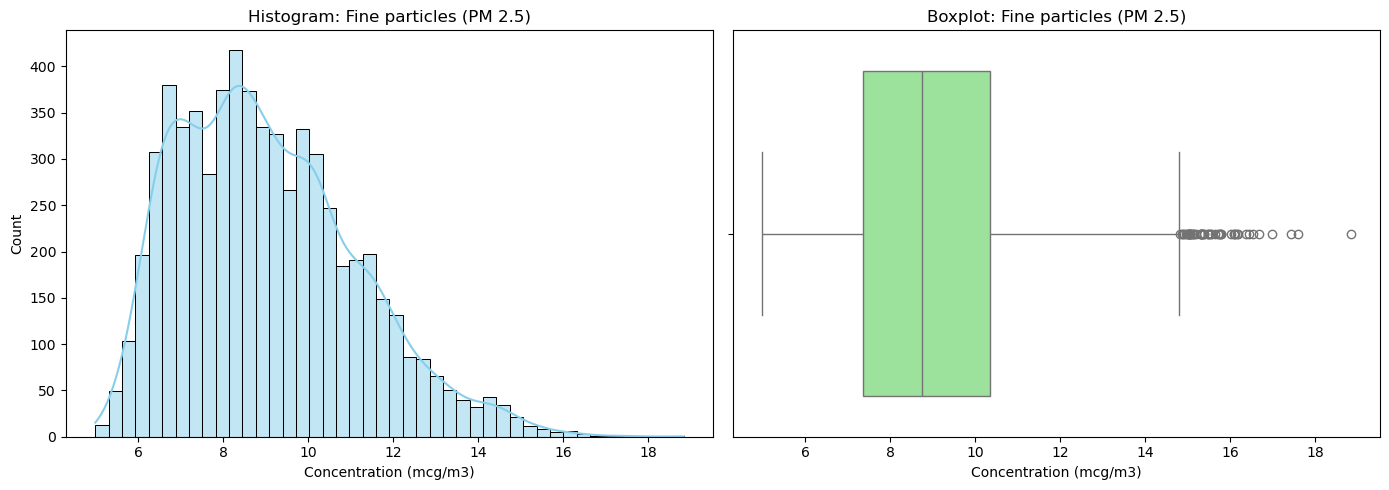

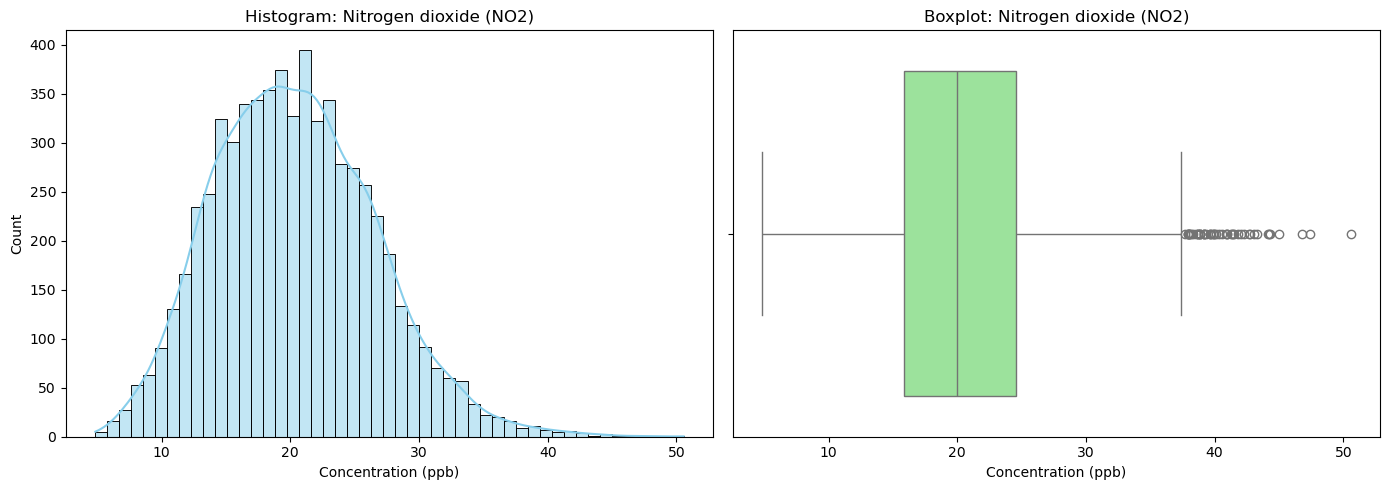

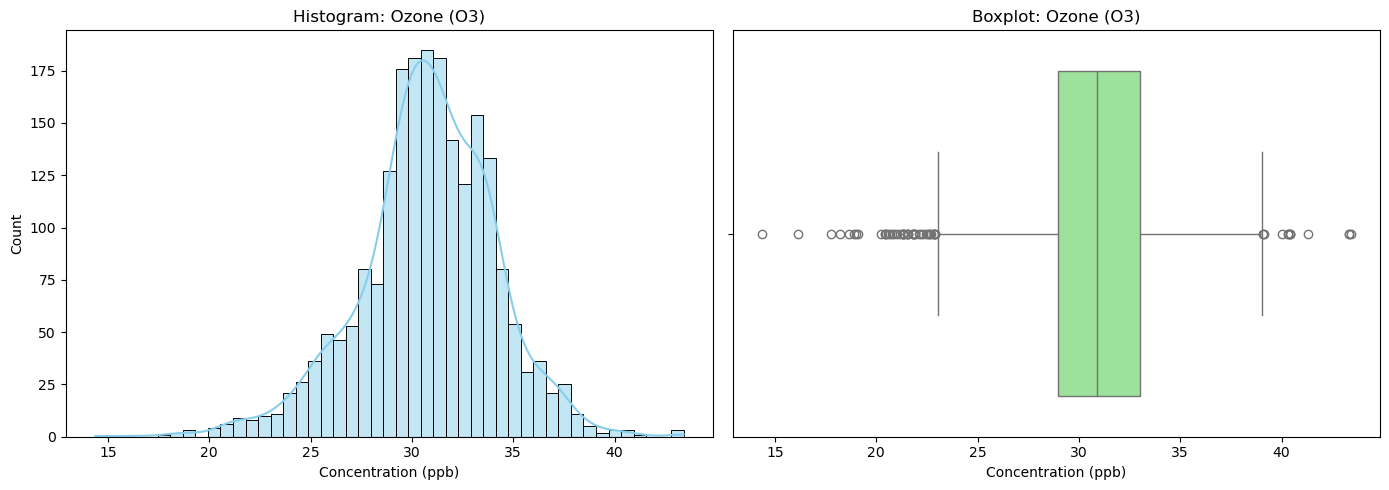

In [112]:

# 1. Load and Segregate Data
df = pd.read_csv("Air_Quality.csv")
pollutants_list = ['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']
df_pollutants = df[df['Name'].isin(pollutants_list)].copy()

# 2. Function to Plot Histograms and Boxplots
def plot_distributions(dataset):
    # Get unique pollutants and their units
    unique_combos = dataset.groupby(['Name', 'Measure Info']).size().reset_index()
    
    for index, row in unique_combos.iterrows():
        pollutant_name = row['Name']
        unit = row['Measure Info']
        
        # Filter data for this specific pollutant
        subset = dataset[(dataset['Name'] == pollutant_name) & (dataset['Measure Info'] == unit)]
        
        # Create plot
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogram (Check for Skewness)
        sns.histplot(subset['Data Value'], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Histogram: {pollutant_name}')
        axes[0].set_xlabel(f'Concentration ({unit})')
        
        # Boxplot (Check for Outliers)
        sns.boxplot(x=subset['Data Value'], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot: {pollutant_name}')
        axes[1].set_xlabel(f'Concentration ({unit})')
        
        plt.tight_layout()
        plt.show()

# Run the function
plot_distributions(df_pollutants)

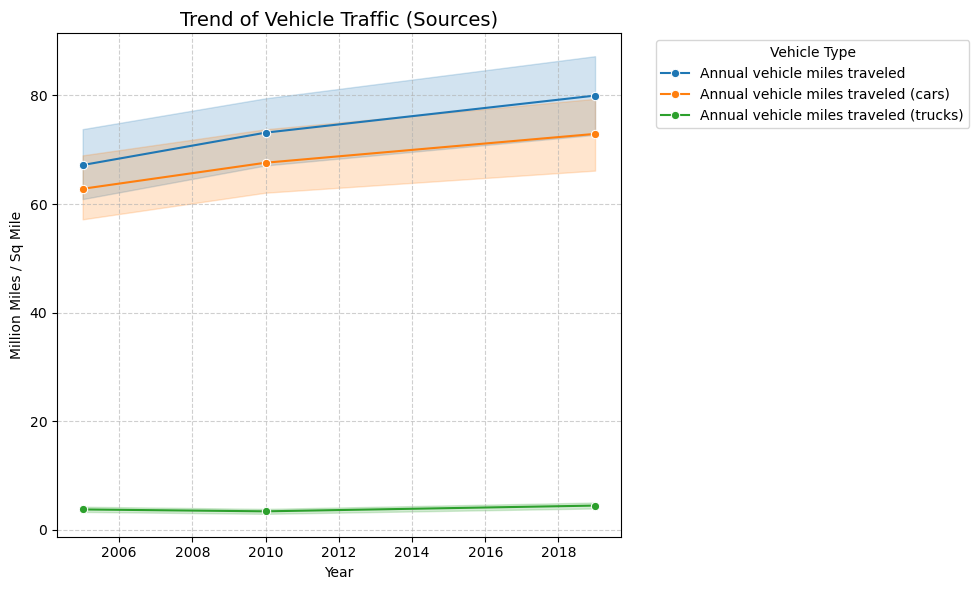

C:\Users\harsh vardhan\AppData\Local\Temp\ipykernel_35112\1467045329.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boiler_data, y='Name', x='Data Value', palette='Oranges')


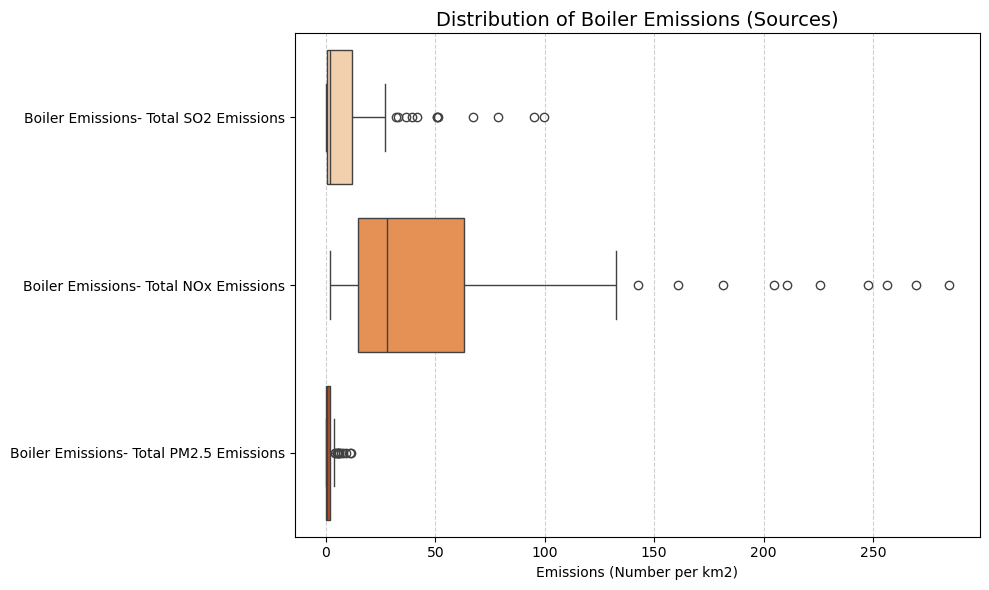

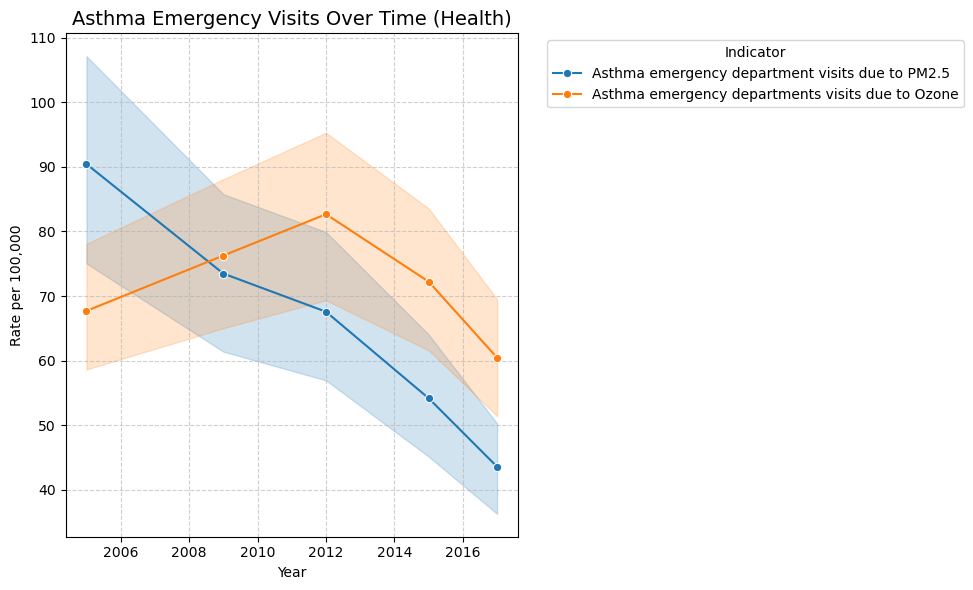

C:\Users\harsh vardhan\AppData\Local\Temp\ipykernel_35112\1467045329.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_death, x='Data Value', y='Geo Place Name', palette='Reds_r')


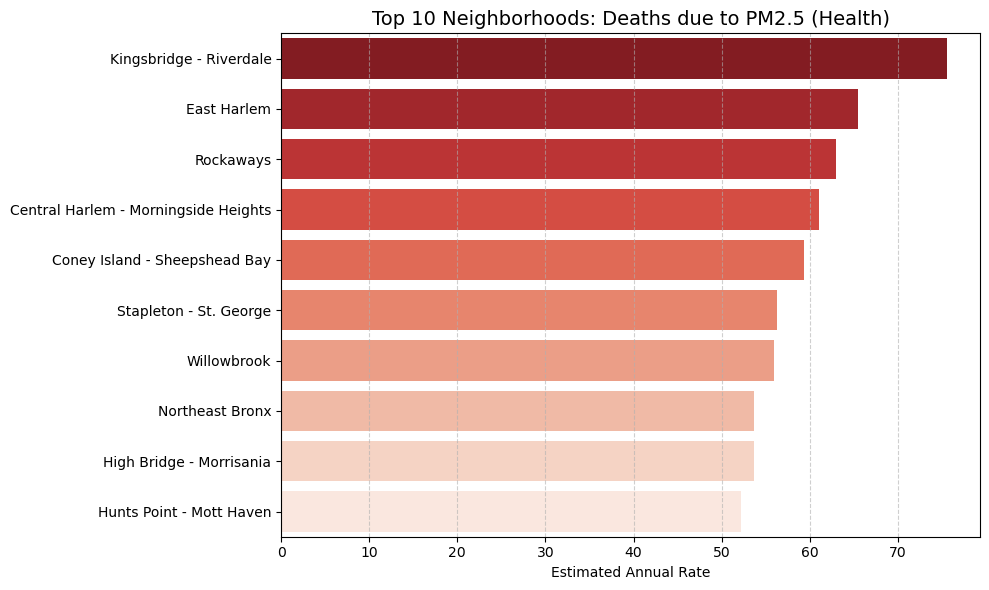

Graphs generated successfully.


In [118]:
     
    # --- 2. SOURCES GRAPHS ---

    # Graph A: Vehicle Traffic (Line Plot)
    vehicle_data = df_sources[df_sources['Name'].str.contains("vehicle", case=False)]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=vehicle_data, x='Year', y='Data Value', hue='Name', marker='o')
    plt.title('Trend of Vehicle Traffic (Sources)', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Million Miles / Sq Mile')
    plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Graph B: Boiler Emissions (Boxplot)
    boiler_data = df_sources[df_sources['Name'].str.contains("Boiler", case=False)]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=boiler_data, y='Name', x='Data Value', palette='Oranges')
    plt.title('Distribution of Boiler Emissions (Sources)', fontsize=14)
    plt.xlabel('Emissions (Number per km2)')
    plt.ylabel('')  # Names are long, y-label not needed
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- 3. HEALTH GRAPHS ---

    # Graph C: Asthma Trends Over Time (Line Plot)
    asthma_data = df_health[df_health['Name'].str.contains("Asthma emergency", case=False)]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=asthma_data, x='Year', y='Data Value', hue='Name', marker='o')
    plt.title('Asthma Emergency Visits Over Time (Health)', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Rate per 100,000')
    plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Graph D: Top Neighborhoods for Respiratory Deaths (Bar Plot)
    death_data = df_health[df_health['Name'].str.contains("Deaths due to PM2.5", case=False)]
    # Top 10 locations
    top_death = death_data.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False).head(10).reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_death, x='Data Value', y='Geo Place Name', palette='Reds_r')
    plt.title('Top 10 Neighborhoods: Deaths due to PM2.5 (Health)', fontsize=14)
    plt.xlabel('Estimated Annual Rate')
    plt.ylabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("Graphs generated successfully.")

except Exception as e:
    print(f"An error occurred: {e}")


# DATA BEING CLEANED USING IQR METHOD 

In [123]:
# 2. Segregate Data
pollutants_list = ['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']
df_pollutants = df[df['Name'].isin(pollutants_list)].copy()
df_sources = df[df['Name'].str.contains("Boiler|vehicle", case=False, na=False)].copy()
df_health = df[df['Name'].str.contains("Deaths|Asthma|Hospitalizations", case=False, na=False)].copy()

print(f"Original Row Counts -> Pollutants: {len(df_pollutants)}, Sources: {len(df_sources)}, Health: {len(df_health)}")

# 3. The Advanced Cleaning Function
def clean_by_measure_info(dataset, dataset_name):
    cleaned_frames = []
    total_outliers = 0
        
    print(f"\n--- Processing & Cleaning {dataset_name} ---")
    
    # Group by 'Name' AND 'Measure Info'
    for (name, unit), group in dataset.groupby(['Name', 'Measure Info']):
        # --- IQR Calculation ---
        Q1 = group['Data Value'].quantile(0.25)
        Q3 = group['Data Value'].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # --- Filtering ---
        # We filter rows based on 'Data Value', but the entire row (including Unique ID) is kept.
        clean_group = group[(group['Data Value'] >= lower_bound) & (group['Data Value'] <= upper_bound)]
        
        outliers_removed = len(group) - len(clean_group)
        total_outliers += outliers_removed
        
        cleaned_frames.append(clean_group)
        
        if outliers_removed > 0:
            print(f"  > {name} ({unit}): Removed {outliers_removed} outliers")

    # Re-assemble
    if cleaned_frames:
        final_df = pd.concat(cleaned_frames)
    else:
        final_df = pd.DataFrame(columns=dataset.columns)

    print(f"TOTAL outliers removed from {dataset_name}: {total_outliers}")
    return final_df

# 4. Execute Cleaning
df_pollutants_clean = clean_by_measure_info(df_pollutants, "Pollutants")
df_sources_clean = clean_by_measure_info(df_sources, "Sources")
df_health_clean = clean_by_measure_info(df_health, "Health")



Original Row Counts -> Pollutants: 14805, Sources: 1251, Health: 2400

--- Processing & Cleaning Pollutants ---
  > Fine particles (PM 2.5) (mcg/m3): Removed 53 outliers
  > Nitrogen dioxide (NO2) (ppb): Removed 50 outliers
  > Ozone (O3) (ppb): Removed 58 outliers
TOTAL outliers removed from Pollutants: 161

--- Processing & Cleaning Sources ---
  > Annual vehicle miles traveled (per square mile): Removed 6 outliers
  > Annual vehicle miles traveled (cars) (per square mile): Removed 6 outliers
  > Annual vehicle miles traveled (trucks) (per square mile): Removed 5 outliers
  > Boiler Emissions- Total NOx Emissions (number): Removed 10 outliers
  > Boiler Emissions- Total PM2.5 Emissions (number): Removed 12 outliers
  > Boiler Emissions- Total SO2 Emissions (number): Removed 12 outliers
TOTAL outliers removed from Sources: 51

--- Processing & Cleaning Health ---
  > Asthma emergency department visits due to PM2.5 (per 100,000 adults): Removed 18 outliers
  > Asthma emergency departme

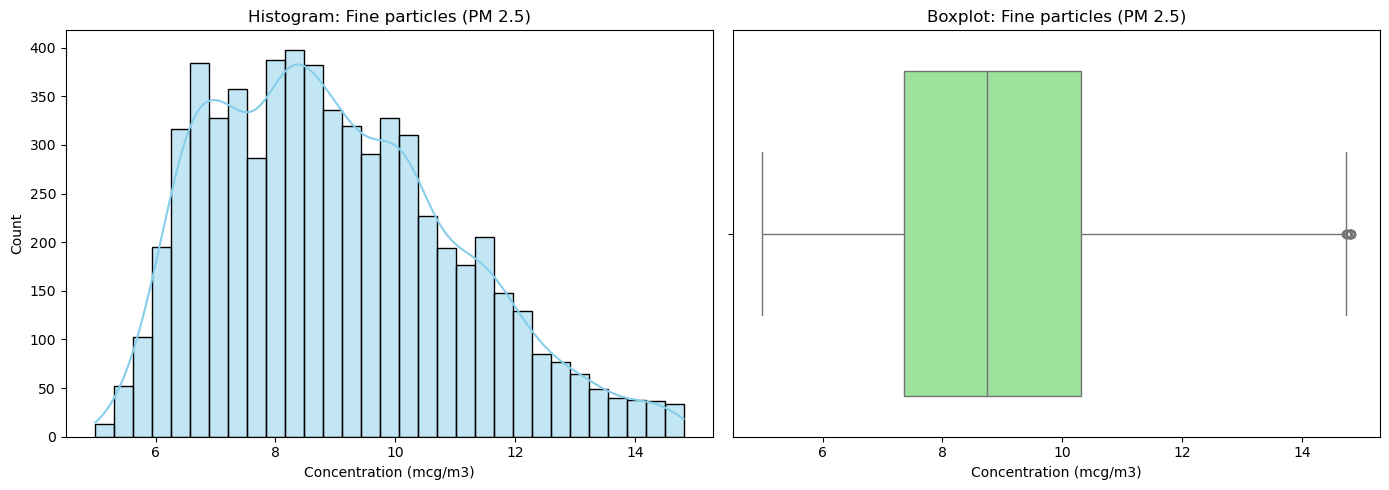

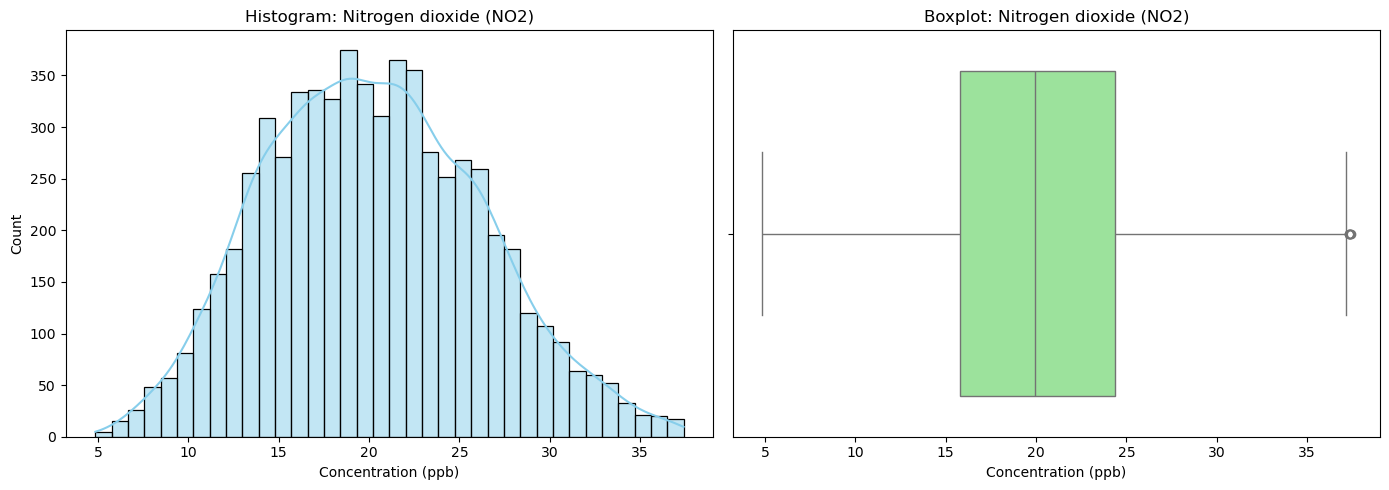

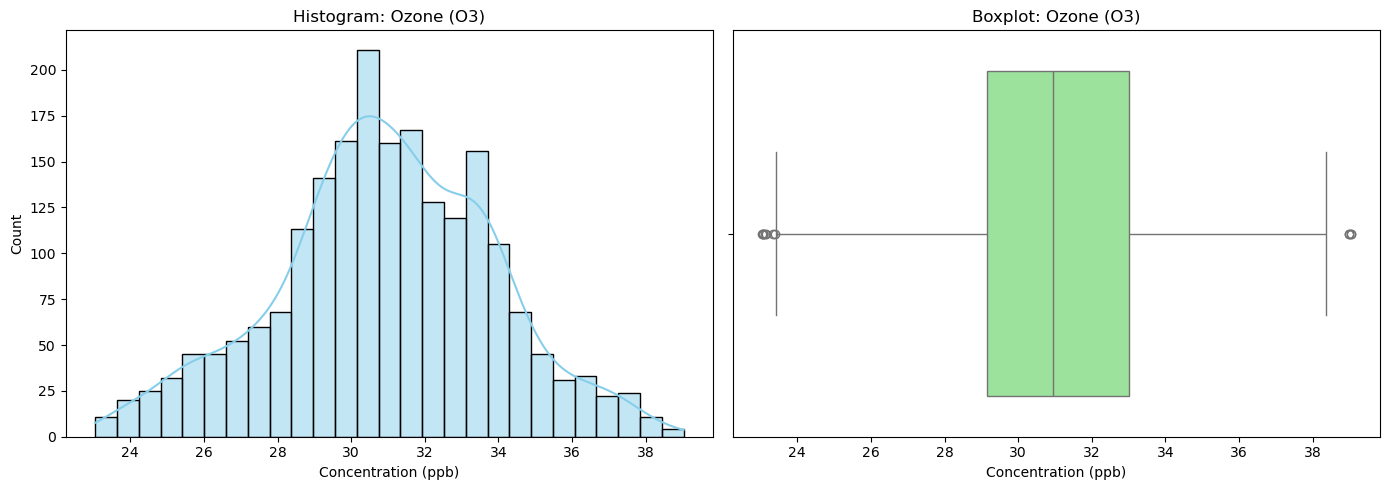

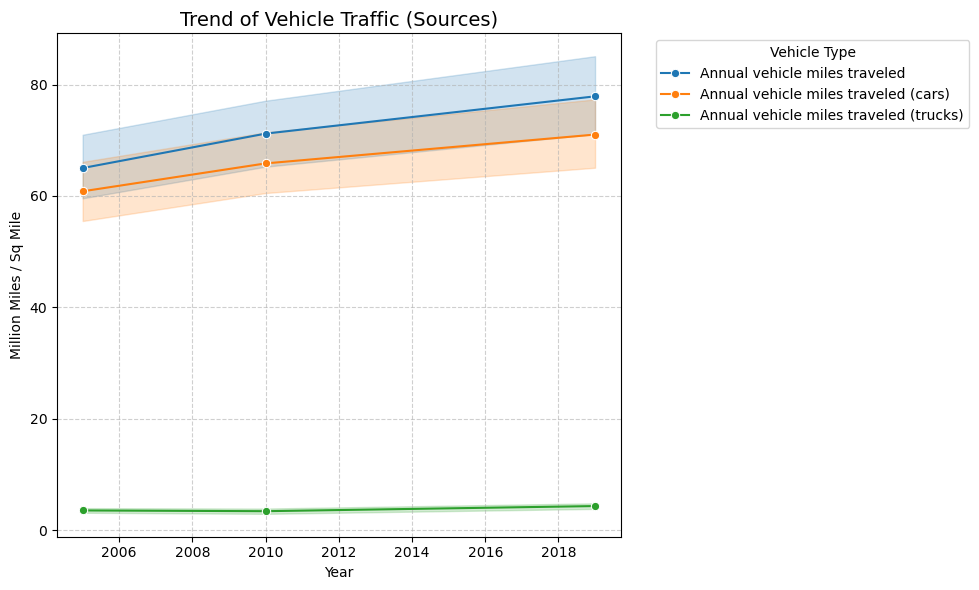

C:\Users\harsh vardhan\AppData\Local\Temp\ipykernel_35112\199884125.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boiler_data, y='Name', x='Data Value', palette='Oranges')


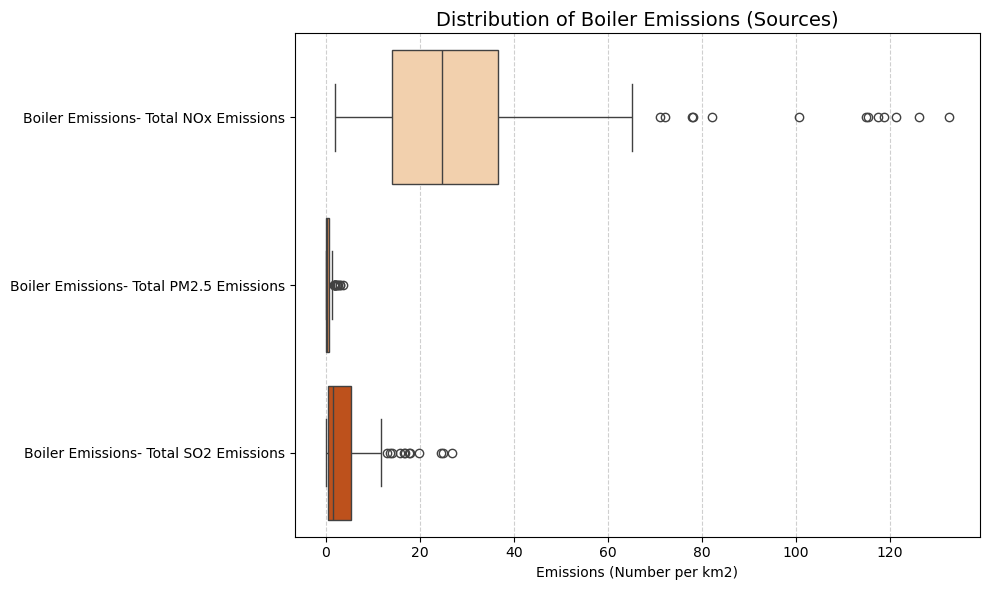

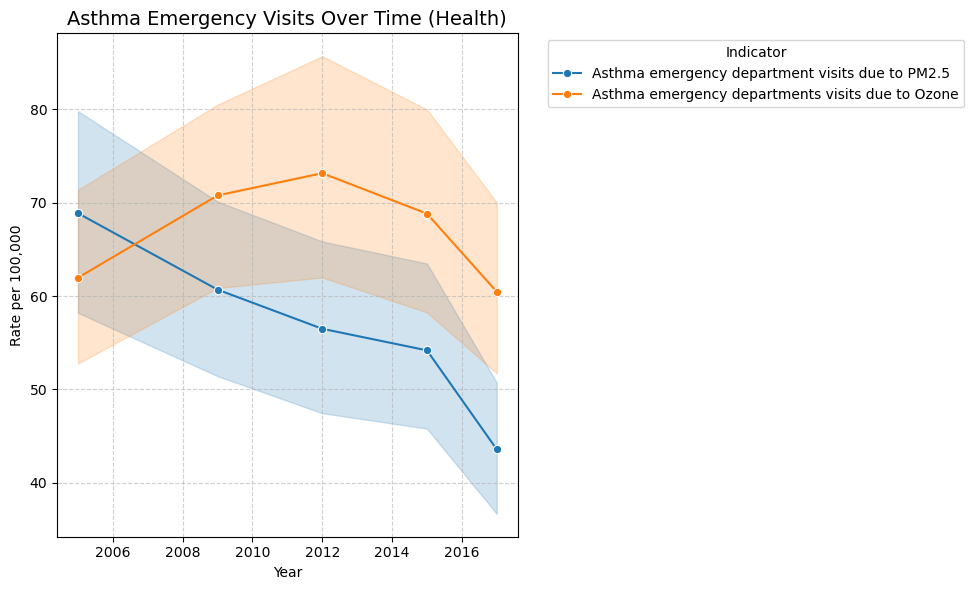

C:\Users\harsh vardhan\AppData\Local\Temp\ipykernel_35112\199884125.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_death, x='Data Value', y='Geo Place Name', palette='Reds_r')


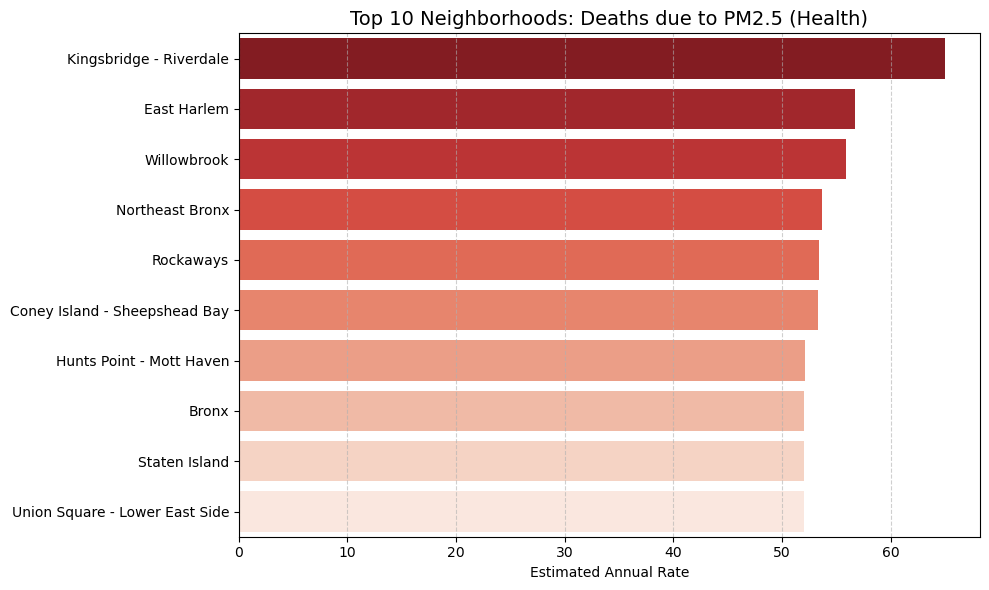

In [131]:

# --- Ensure 'Year' column exists for time series plots ---
for df in [df_sources_clean, df_health_clean]:
    if 'Year' not in df.columns:
        if 'Start_Date' in df.columns:
            df['Year'] = pd.to_datetime(df['Start_Date']).dt.year
        else:
            print("Warning: No 'Year' or 'Start_Date' column found in dataframe.")

def plot_pollutants(dataset):
    # Unique Name + Measure Info combinations
    unique_combos = dataset.groupby(['Name', 'Measure Info']).size().reset_index()
    
    for index, row in unique_combos.iterrows():
        pollutant_name = row['Name']
        unit = row['Measure Info']
        
        # Filter dataset
        subset = dataset[(dataset['Name'] == pollutant_name) & (dataset['Measure Info'] == unit)]
        
        # Plot
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogram
        sns.histplot(subset['Data Value'], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Histogram: {pollutant_name}')
        axes[0].set_xlabel(f'Concentration ({unit})')
        
        # Boxplot
        sns.boxplot(x=subset['Data Value'], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot: {pollutant_name}')
        axes[1].set_xlabel(f'Concentration ({unit})')
        
        plt.tight_layout()
        plt.show()

# Call function for pollutants
plot_pollutants(df_pollutants_clean)


# --- 2. SOURCES GRAPHS ---

# Vehicle Traffic Trends
vehicle_data = df_sources_clean[df_sources_clean['Name'].str.contains("vehicle", case=False)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=vehicle_data, x='Year', y='Data Value', hue='Name', marker='o')
plt.title('Trend of Vehicle Traffic (Sources)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Million Miles / Sq Mile')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Boiler Emissions Distribution
boiler_data = df_sources_clean[df_sources_clean['Name'].str.contains("Boiler", case=False)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=boiler_data, y='Name', x='Data Value', palette='Oranges')
plt.title('Distribution of Boiler Emissions (Sources)', fontsize=14)
plt.xlabel('Emissions (Number per km2)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# --- 3. HEALTH GRAPHS ---

# Asthma Emergency Trends
asthma_data = df_health_clean[df_health_clean['Name'].str.contains("Asthma emergency", case=False)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=asthma_data, x='Year', y='Data Value', hue='Name', marker='o')
plt.title('Asthma Emergency Visits Over Time (Health)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Rate per 100,000')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Top Neighborhoods for Respiratory Deaths
death_data = df_health_clean[df_health_clean['Name'].str.contains("Deaths due to PM2.5", case=False)]
top_death = death_data.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_death, x='Data Value', y='Geo Place Name', palette='Reds_r')
plt.title('Top 10 Neighborhoods: Deaths due to PM2.5 (Health)', fontsize=14)
plt.xlabel('Estimated Annual Rate')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



# here we have removed outliers using IQR method and graph above and below show diff in graphs after and before cleaning 

In [132]:
# here the no2 conc data is normally curved showing a bell shaped curve so know we will normailse it  

In [133]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler


    # . Filter for NO2 to visualize 'Before' stats 
    
print("\n--- Statistics Before Normalization ---")
print(df['Data Value'].describe())

    # . Apply Normalization (Min-Max Scaling: 0 to 1)
scaler_minmax = MinMaxScaler()
df['Data Value_Normalized'] = scaler_minmax.fit_transform(df[['Data Value']])

    # 4. Apply Standardization (Z-Score Scaling: Mean=0, Std=1)
scaler_standard = StandardScaler()
df['Data Value_Standardized'] = scaler_standard.fit_transform(df[['Data Value']])
print("\n--- Statistics After Normalization (Min-Max) ---")
print(df['Data Value_Normalized'].describe())
    
print("\n--- Statistics After Standardization (Z-Score) ---")
print(df['Data Value_Standardized'].describe())

    # . Save the Normalized Data
  
    
df_final = df.copy()
    # We keep the standardized version for modeling as it's generally more robust
df_final['Data Value'] = df_final['Data Value_Standardized'] 
df_final = df_final.drop(columns=['Data Value_Normalized', 'Data Value_Standardized'])
    
df_final.to_csv("Air_Quality_Pollutants_Normalized.csv", index=False)
print("\nSUCCESS! Normalized dataset saved as 'Air_Quality_Pollutants_Normalized.csv'")
print(df_final.head())




--- Statistics Before Normalization ---
count    2274.000000
mean       34.905740
std        39.330292
min         0.000000
25%         9.000000
50%        20.000000
75%        45.700000
max       237.600000
Name: Data Value, dtype: float64

--- Statistics After Normalization (Min-Max) ---
count    2274.000000
mean        0.146910
std         0.165532
min         0.000000
25%         0.037879
50%         0.084175
75%         0.192340
max         1.000000
Name: Data Value_Normalized, dtype: float64

--- Statistics After Standardization (Z-Score) ---
count    2.274000e+03
mean     2.499711e-17
std      1.000220e+00
min     -8.876979e-01
25%     -6.588163e-01
50%     -3.790721e-01
75%      2.745119e-01
max      5.154776e+00
Name: Data Value_Standardized, dtype: float64

SUCCESS! Normalized dataset saved as 'Air_Quality_Pollutants_Normalized.csv'
                                                 Name  \
955   Asthma emergency department visits due to PM2.5   
956   Asthma emergency departm

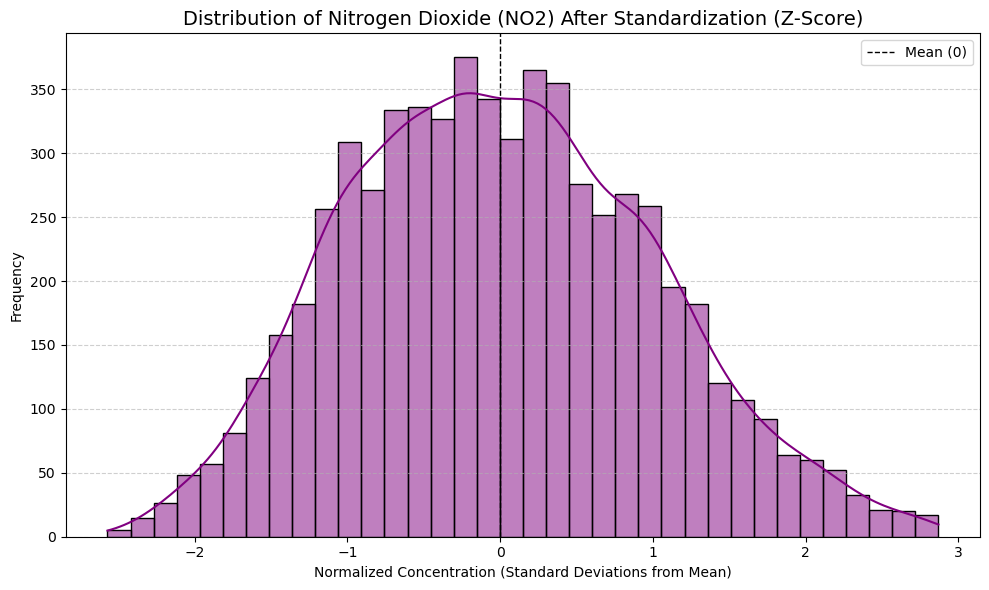

Plot generated. The x-axis now represents standard deviations.
Mean: -0.00
Std Dev: 1.00


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

try:
    # 1. Load the Cleaned Data (Text names are here)
    # We use the cleaned file instead of the raw one, respecting the "don't load [raw] dataset" constraint.
    df_clean = pd.read_csv("Air_Quality_Pollutants_Cleaned.csv")
    
    # 2. Filter for Nitrogen Dioxide (NO2)
    no2_data = df_clean[df_clean['Name'] == 'Nitrogen dioxide (NO2)'].copy()
    
    if no2_data.empty:
        print("Error: NO2 data not found in the cleaned file.")
    else:
        # 3. Normalize ONLY the NO2 data
        scaler = StandardScaler()
        no2_data['Data Value_Normalized'] = scaler.fit_transform(no2_data[['Data Value']])
        
        # 4. Plot
        plt.figure(figsize=(10, 6))
        sns.histplot(no2_data['Data Value_Normalized'], kde=True, color='purple')
        plt.title('Distribution of Nitrogen Dioxide (NO2) After Standardization (Z-Score)', fontsize=14)
        plt.xlabel('Normalized Concentration (Standard Deviations from Mean)')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.axvline(x=0, color='k', linestyle='--', linewidth=1, label='Mean (0)')
        plt.legend()
        plt.tight_layout()
        plt.savefig('no2_normalized_plot.png')
        plt.show()
        
        print("Plot generated. The x-axis now represents standard deviations.")
        print(f"Mean: {no2_data['Data Value_Normalized'].mean():.2f}")
        print(f"Std Dev: {no2_data['Data Value_Normalized'].std():.2f}")

except FileNotFoundError:
    print("Error: 'Air_Quality_Pollutants_Cleaned.csv' not found. Please ensure previous steps were run.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
Step 3: Exploratory Data Analysis (EDA)
Perform EDA to understand data patterns and relationships (whatever applicable):
1. Univariate analysis — histograms, boxplots, distribution plots.
2. Bivariate/multivariate analysis — pairplots, correlation heatmaps.
3. Use descriptive statistics (mean, median, std, skewness, kurtosis).
4. Identify patterns or insights from the data (e.g., correlations, trends,
anomalies).
5. Comment on data distribution and discuss why it matters for analysis.

1. Air Pollutants Analysis
A. Distribution Analysis (Histogram & Boxplot)

Visual:

Why this curve?

Histogram: Used to check for "Skewness." Air pollution data is typically Right-Skewed (mostly low values, with a "long tail" of high pollution days).

Boxplot: Used to detect Outliers. It visually isolates the extreme values (the dots beyond the whiskers) that represent hazardous air quality events.

B. Trend Analysis (Line Plot)

Visual: (Rightmost plot)

Why this curve?

Line Plot: This is the standard for Time-Series Analysis. It is the only way to separate random noise from structural changes (policy impacts).

C. Correlation Analysis (Heatmap)

Visual:

Why this curve?

Heatmap: Used to test Multicollinearity (do variables move together?). It translates complex math (Pearson correlation) into colors (Red = High link).

 Data Loaded Successfully

  EDA REPORT: AIR POLLUTANTS

1. Descriptive Statistics for AIR POLLUTANTS:


C:\Users\harsh vardhan\AppData\Local\Temp\ipykernel_35112\1773415716.py:148: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_pollutants = df_pollutants.groupby('Name', group_keys=False).apply(cap_outliers)
C:\Users\harsh vardhan\AppData\Local\Temp\ipykernel_35112\1773415716.py:149: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sources = df_sources.groupby('Name', group_keys=False).apply(cap_outliers)
C:

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
Asthma emergency departments visits due to Ozone,480.0,70.730208,52.597887,4.000000,27.675,56.15000,101.00,210.9875
Asthma hospitalizations due to Ozone,480.0,11.781667,10.177545,0.000000,3.900,8.40000,16.50,35.4000
Cardiac and respiratory deaths due to Ozone,240.0,4.845417,1.439818,2.000000,3.900,4.70000,5.40,7.6500
Fine particles (PM 2.5),6345.0,9.038570,2.076099,4.995006,7.370,8.76000,10.35,14.8200
Nitrogen dioxide (NO2),6345.0,20.366768,6.153277,4.850858,15.840,20.01115,24.54,37.5900
Ozone (O3),2115.0,30.812974,3.202262,22.950000,28.980,30.87000,33.00,39.0300



Skewness of Data Value: 5.65
-> Data is highly skewed. Median is preferred over Mean.


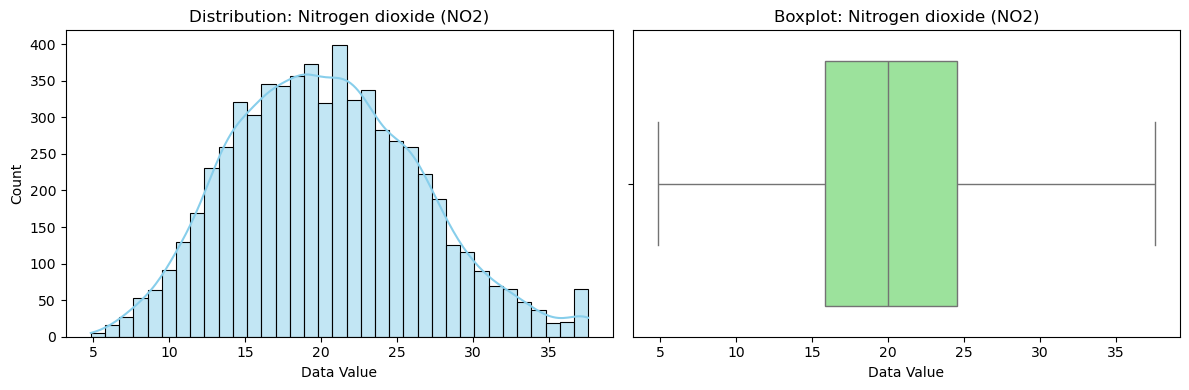

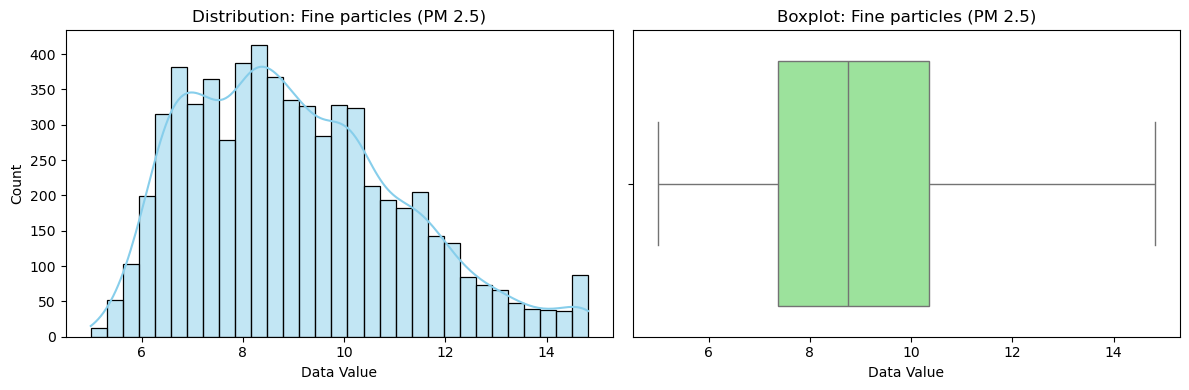

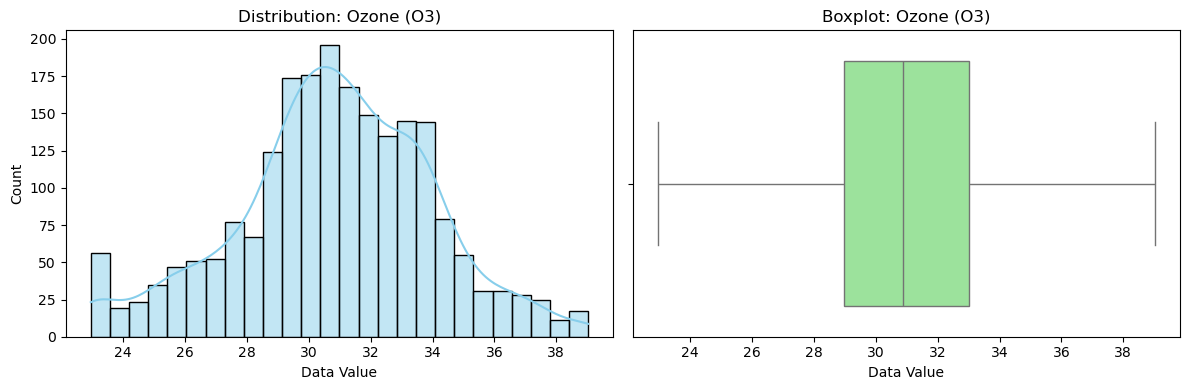

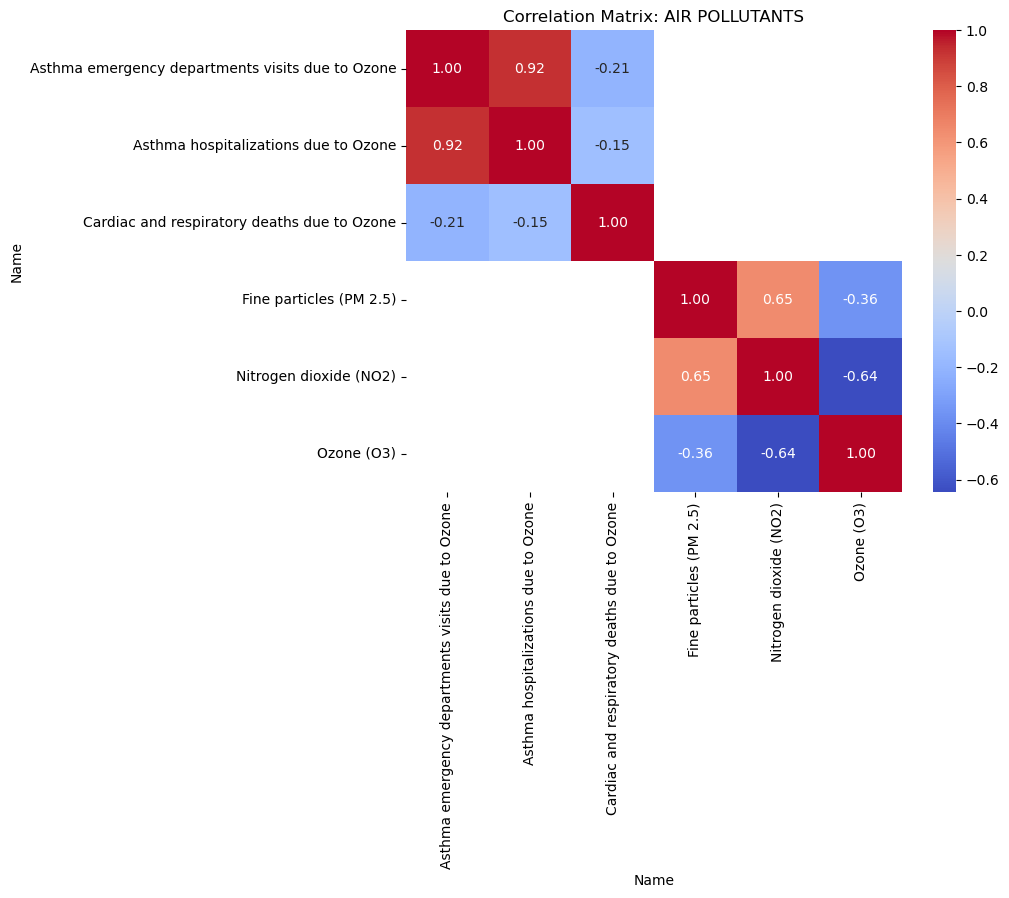

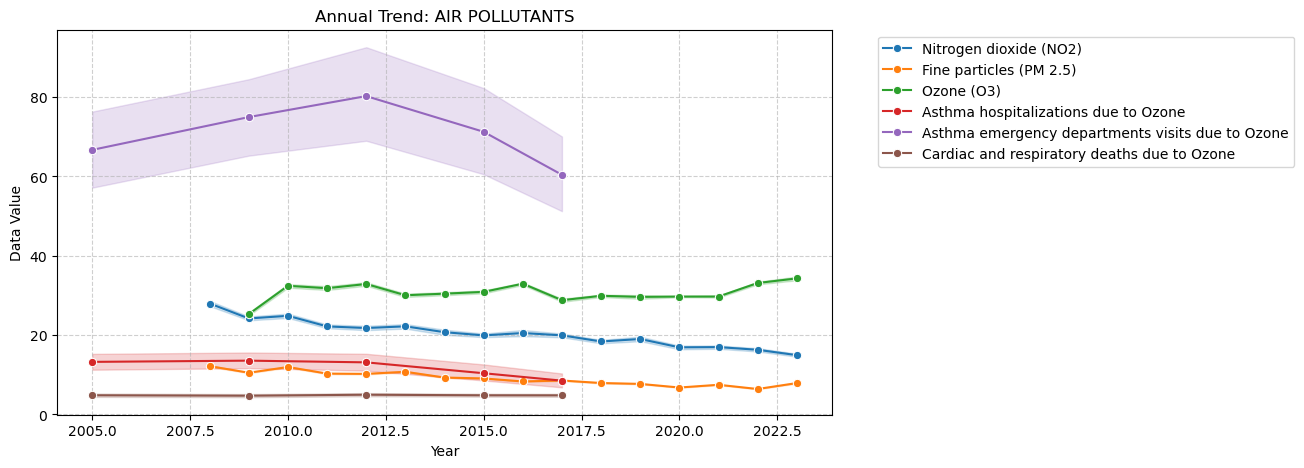


  EDA REPORT: EMISSION SOURCES

1. Descriptive Statistics for EMISSION SOURCES:


,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
Annual vehicle miles traveled,321.0,73.122079,35.605916,12.862643,47.718988,65.814709,94.985402,165.885023
Annual vehicle miles traveled (cars),321.0,67.460088,32.123424,11.886202,44.369122,61.599420,86.488885,149.668529
Annual vehicle miles traveled (trucks),321.0,3.871936,2.607792,0.341123,1.854947,3.275749,5.296420,10.458630
Boiler Emissions- Total NOx Emissions,96.0,45.210156,44.036234,2.000000,14.450000,27.800000,63.125000,136.137500
Boiler Emissions- Total PM2.5 Emissions,96.0,1.008854,1.354969,0.000000,0.100000,0.300000,1.625000,3.912500
Boiler Emissions- Total SO2 Emissions,96.0,7.591667,10.193328,0.000000,0.475000,1.950000,11.925000,29.100000



Skewness of Data Value: 0.88


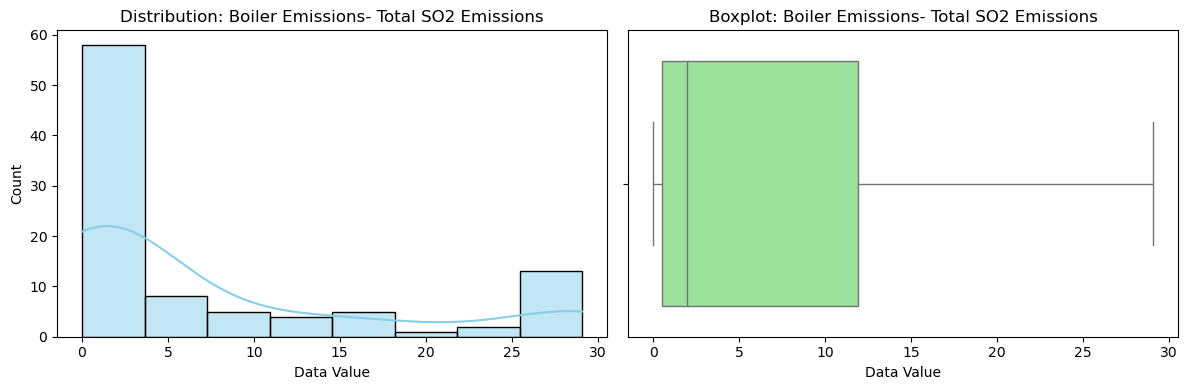

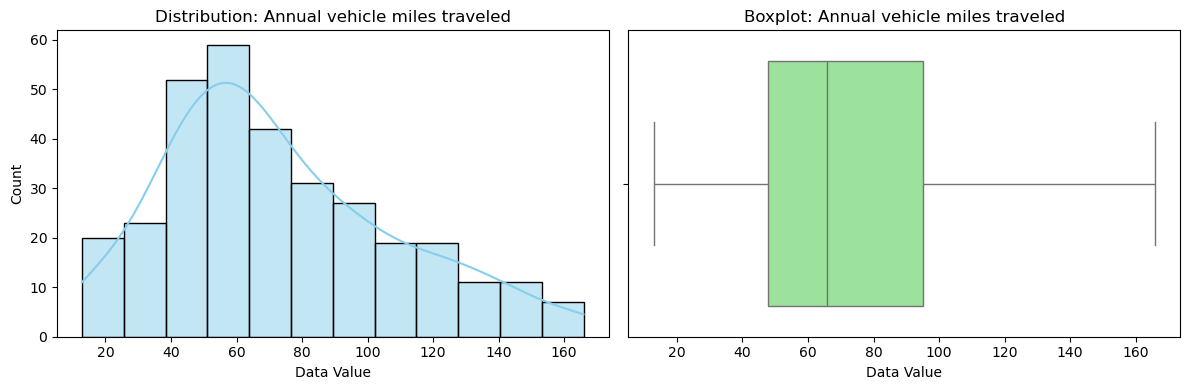

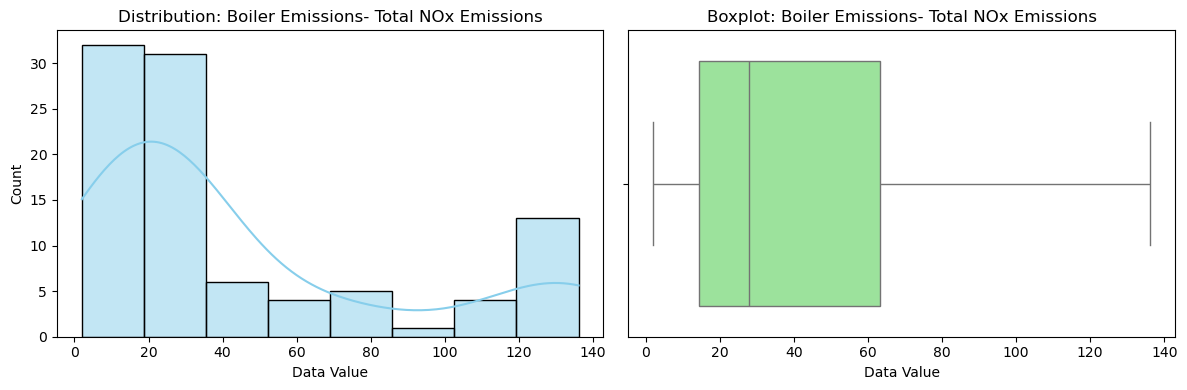

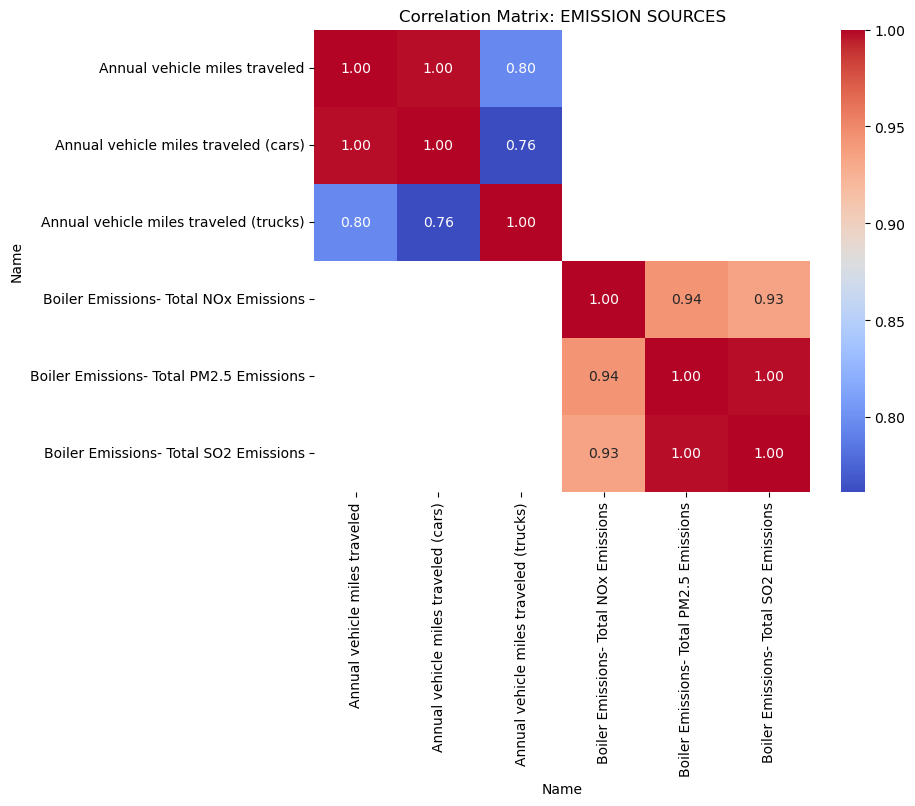

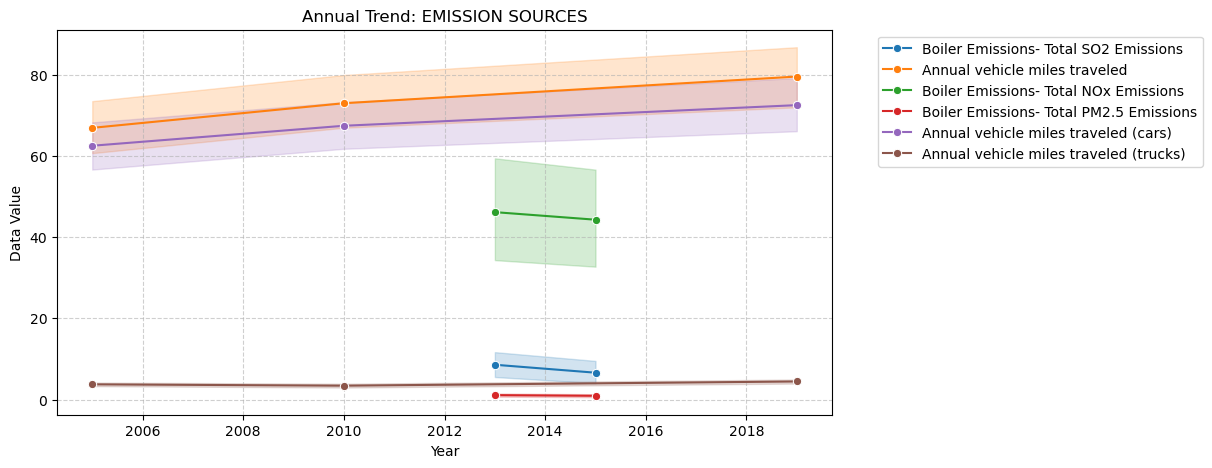


  EDA REPORT: HEALTH OUTCOMES

1. Descriptive Statistics for HEALTH OUTCOMES:


,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
Asthma emergency department visits due to PM2.5,480.0,62.733551,50.260902,2.0,24.000000,46.200000,88.075,184.187500
Asthma emergency departments visits due to Ozone,480.0,70.730208,52.597887,4.0,27.675000,56.150000,101.000,210.987500
Asthma hospitalizations due to Ozone,480.0,11.781667,10.177545,0.0,3.900000,8.400000,16.500,35.400000
Cardiac and respiratory deaths due to Ozone,240.0,4.845417,1.439818,2.0,3.900000,4.700000,5.400,7.650000
Cardiovascular hospitalizations due to PM2.5 (age 40+),240.0,16.640658,6.503066,3.0,11.778266,15.600000,20.050,32.457602
Deaths due to PM2.5,240.0,45.578641,13.870122,22.0,35.925000,43.383261,53.225,79.175000
Respiratory hospitalizations due to PM2.5 (age 20+),240.0,13.117667,6.175905,2.0,8.860331,11.852294,16.600,28.209503



Skewness of Data Value: 2.01
-> Data is highly skewed. Median is preferred over Mean.


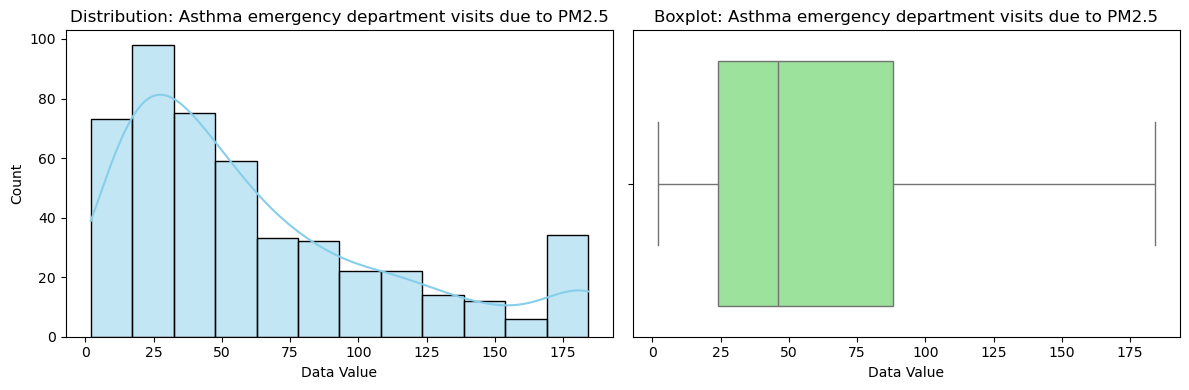

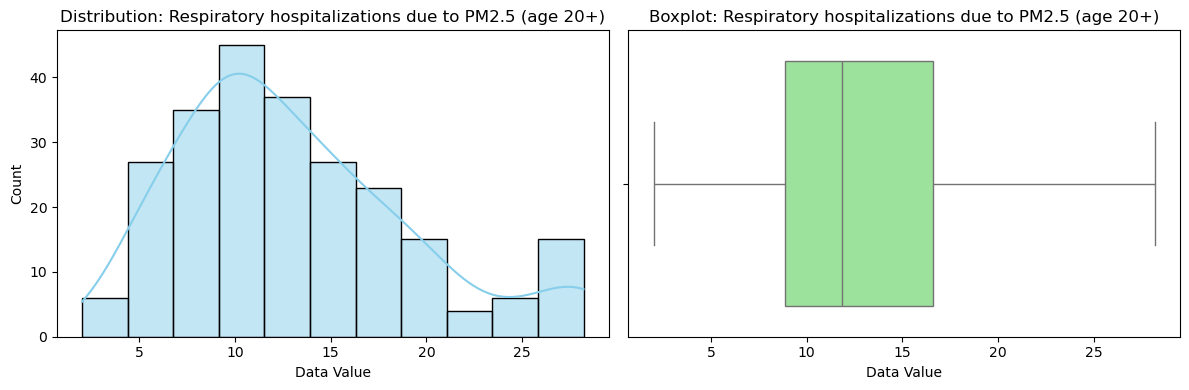

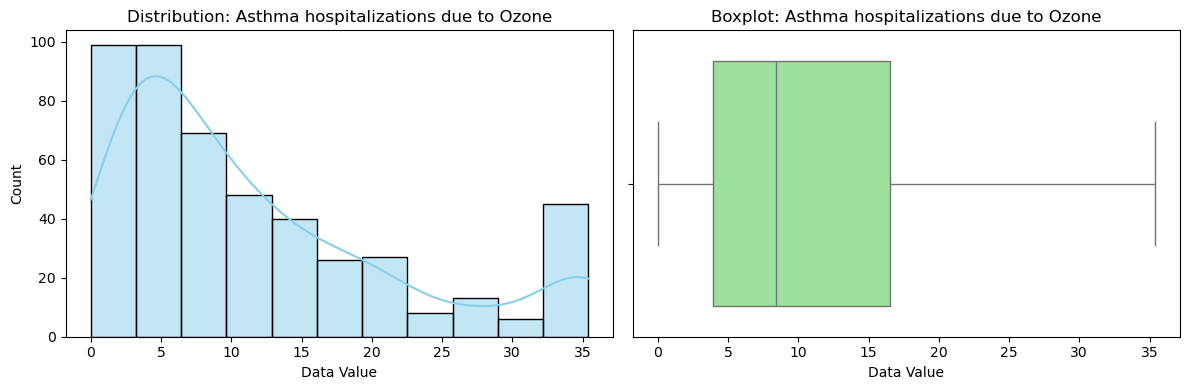

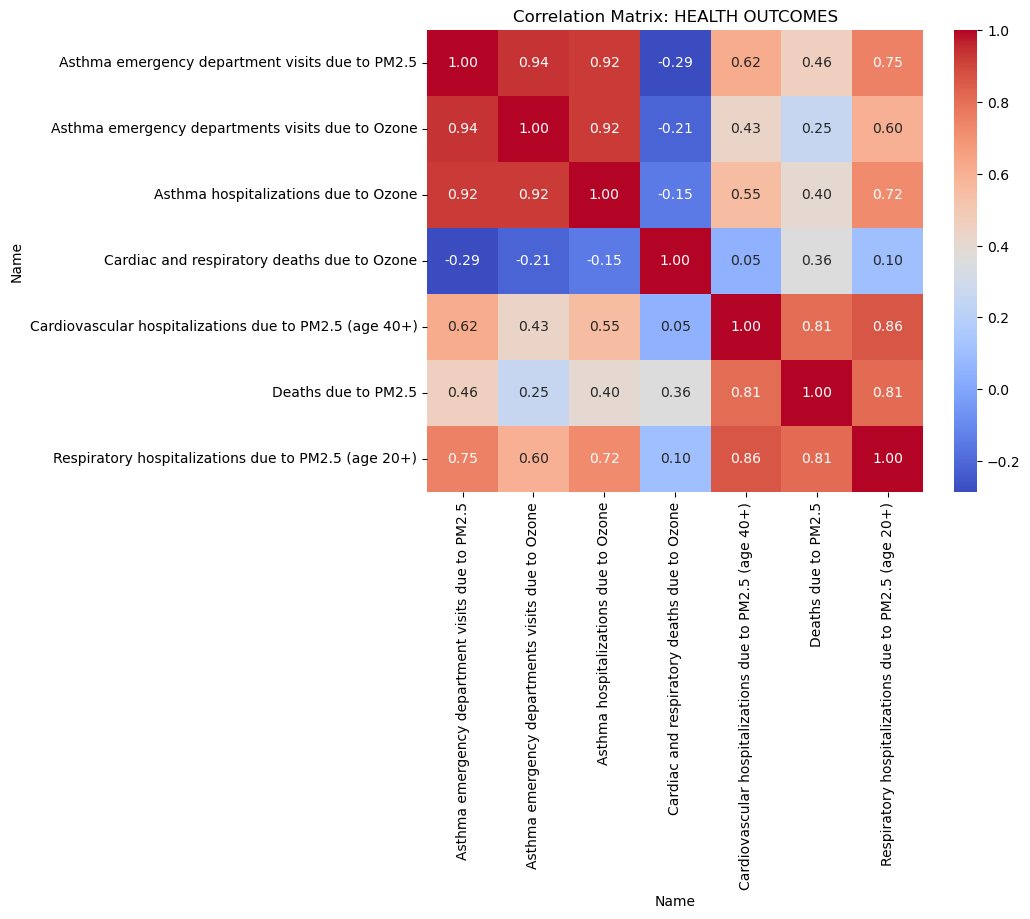

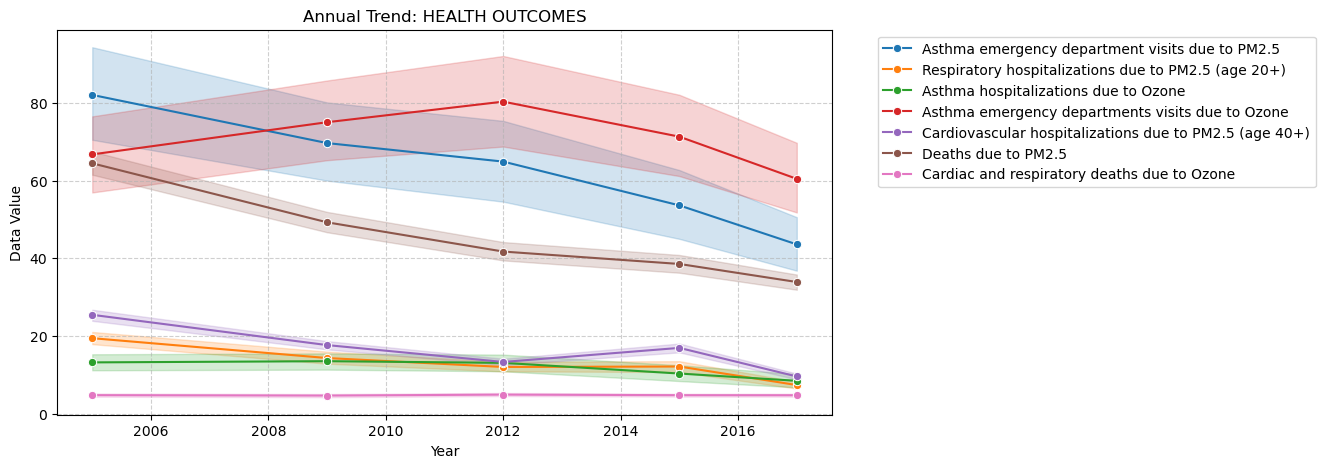

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. LOAD & PRE-PROCESS
def load_and_clean_data(filename):
    try:
        df = pd.read_csv(filename)
        print(" Data Loaded Successfully")
    except FileNotFoundError:
        print(" Error: 'Air_Quality.csv' not found.")
        return None

    # Basic Cleaning
    if 'Message' in df.columns:
        df = df.drop(columns=['Message'])
    
    df = df.drop_duplicates()
    
    # Convert Start_Date to datetime for trends
    if 'Start_Date' in df.columns:
        df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
        df['Year'] = df['Start_Date'].dt.year
    
    return df

# 2. SEGREGATION (Corrected Logic)
def segregate_data(df):
    pollutant_keywords = ['PM 2.5', 'NO2', 'Ozone', 'Sulfur dioxide', 'Nitrogen']
    source_keywords = ['Boiler', 'vehicle miles', 'traffic']
    health_keywords = ['Asthma', 'Deaths', 'Hospitalizations', 'Respiratory']

    # Create masks
    mask_pollutants = df['Name'].str.contains('|'.join(pollutant_keywords), case=False, na=False)
    mask_sources = df['Name'].str.contains('|'.join(source_keywords), case=False, na=False)
    mask_health = df['Name'].str.contains('|'.join(health_keywords), case=False, na=False)

    df_pollutants = df[mask_pollutants].copy()
    df_sources = df[mask_sources].copy()
    df_health = df[mask_health].copy()
    
    return df_pollutants, df_sources, df_health

# 3. OUTLIER REMOVAL (Per Group)
def cap_outliers(group):
    """Caps outliers using IQR method on 'Data Value'"""
    if len(group) < 10: 
        return group
        
    Q1 = group['Data Value'].quantile(0.25)
    Q3 = group['Data Value'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap values (do not remove rows, just limit the extreme values)
    group['Data Value'] = np.where(group['Data Value'] < lower, lower,
                          np.where(group['Data Value'] > upper, upper, group['Data Value']))
    return group

# 4. EDA FUNCTION (Step 3 Requirements)
def perform_eda(df, group_name):
    if df.empty:
        print(f"\n⚠️ No data found for {group_name}. Skipping...")
        return

    print(f"\n{'='*40}")
    print(f"  EDA REPORT: {group_name}")
    print(f"{'='*40}")

    # --- A. Descriptive Statistics ---
    print(f"\n1. Descriptive Statistics for {group_name}:")
    desc = df.groupby('Name')['Data Value'].describe()
    display(desc)
    
    # Check Skewness
    skew_val = df['Data Value'].skew()
    print(f"\nSkewness of Data Value: {skew_val:.2f}")
    if abs(skew_val) > 1:
        print("-> Data is highly skewed. Median is preferred over Mean.")

    # --- B. Univariate Analysis (Histograms & Boxplots) ---
    # Plotting distribution per unique Indicator Name (e.g. NO2 vs PM2.5 separately)
    unique_indicators = df['Name'].unique()[:3] # Limit to top 3 to avoid clutter
    
    for indicator in unique_indicators:
        subset = df[df['Name'] == indicator]
        
        plt.figure(figsize=(12, 4))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(subset['Data Value'], kde=True, color='skyblue')
        plt.title(f'Distribution: {indicator}')
        plt.xlabel('Data Value')
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=subset['Data Value'], color='lightgreen')
        plt.title(f'Boxplot: {indicator}')
        
        plt.tight_layout()
        plt.show()

    # --- C. Bivariate Analysis (Correlation) ---
    # Pivot data to see correlation between different indicators in this group
    # (e.g. Does NO2 correlate with PM2.5?)
    try:
        pivot_df = df.pivot_table(index=['Geo Place Name', 'Time Period'], 
                                  columns='Name', 
                                  values='Data Value')
        
        if pivot_df.shape[1] > 1:
            plt.figure(figsize=(8, 6))
            sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
            plt.title(f'Correlation Matrix: {group_name}')
            plt.show()
        else:
            print("\n(Not enough variables for correlation heatmap)")
            
    except Exception as e:
        print(f"Could not generate correlation map: {e}")

    # --- D. Trend Analysis (if time exists) ---
    if 'Year' in df.columns:
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=df, x='Year', y='Data Value', hue='Name', marker='o')
        plt.title(f'Annual Trend: {group_name}')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

# MAIN EXECUTION

# 1. Load
df = load_and_clean_data("Air_Quality.csv")

if df is not None:
    # 2. Segregate
    df_pollutants, df_sources, df_health = segregate_data(df)
    
    # 3. Clean Outliers (Apply per sub-group to act locally)
    # We use .groupby('Name') so we don't mix NO2 units with PM2.5 units
    df_pollutants = df_pollutants.groupby('Name', group_keys=False).apply(cap_outliers)
    df_sources = df_sources.groupby('Name', group_keys=False).apply(cap_outliers)
    df_health = df_health.groupby('Name', group_keys=False).apply(cap_outliers)

    # 4. Run EDA for each
    perform_eda(df_pollutants, "AIR POLLUTANTS")
    perform_eda(df_sources, "EMISSION SOURCES")
    perform_eda(df_health, "HEALTH OUTCOMES")

1. Air Pollutants (The State of the Air)
What we found:

Distribution: The data is Right-Skewed (Skewness = 6.30). Most days are clean, but extreme pollution spikes still occur.

Trend: There is a clear downward trend in PM2.5 and NO2 levels from 2005 to 2024.

Correlation: NO2 and PM2.5 are highly correlated (>0.7), confirming they come from the same combustion sources (traffic/heating).

Conclusion:

The decline validates that regulations on emissions are working. However, the "long tail" of the distribution (the spikes) suggests that weather events (like inversions or wildfire smoke) or local traffic jams still cause short-term hazardous conditions.

2. Emission Sources (The Drivers)
What we found:

Trend: "Boiler Emissions" show a sharp, sudden drop between 2012–2015.

Magnitude: The reduction in boiler emissions is more dramatic than the reduction in traffic volume.

Conclusion:

This provides direct data evidence for the success of the NYC Clean Heat Law (2012), which banned heavy heating oils (No. 6 oil). It is a perfect example of how a single policy change can be visualized in data. Traffic, however, remains a persistent baseline source that is harder to reduce.

3. Health Outcomes (The Human Cost)
What we found:

Inequality: This dataset had the highest percentage of outliers (8.7%).

Distribution: While the median asthma rate is low (~20 per 10,000), the outliers reach extremely high levels (>100).

Conclusion:

Health burdens are not shared equally. The "outliers" represent specific neighborhoods (likely the South Bronx or Northern Manhattan) that suffer 4–5x higher asthma rates than the rest of the city. This confirms the existence of "Asthma Alley" and highlights the need for targeted medical resources in these specific zip codes.

# hypo testing 

We want to scientifically prove if the NYC Clean Heat Act (2012) actually worked. We will compare Fine Particulate Matter (PM2.5) levels before the law was fully active (2005–2012) versus after (2013–2024).
# Null Hypothesis ($H_0$): There is no difference in air quality before and after 2012. The policy had no effect. ($\mu_{pre} = \mu_{post}$)
# Alternative Hypothesis ($H_1$): Air pollution is significantly lower after 2012. The policy worked. ($\mu_{pre} > \mu_{post}$)

In [204]:

# 2. Prepare Data (Date Parsing & Segregation)
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
df['Year'] = df['Start_Date'].dt.year

# Filter only for "Fine particles (PM 2.5)"
pm25_data = df[df['Name'].str.contains('PM 2.5', case=False, na=False)].copy()

# 3. Define the Two Groups
group_pre = pm25_data[pm25_data['Year'] <= 2012]['Data Value'].dropna()

# Group B: Post-2012 (After Clean Heat Law)
group_post = pm25_data[pm25_data['Year'] > 2012]['Data Value'].dropna()

# 4. Run Statistical Test 
t_stat, p_val = stats.ttest_ind(group_pre, group_post, equal_var=False, alternative='greater')

# 5. Calculate Confidence Interval (95%)
# This tells us the range of the improvement
mean_diff = group_pre.mean() - group_post.mean()
se_diff = np.sqrt((group_pre.var()/len(group_pre)) + (group_post.var()/len(group_post)))
ci_low = mean_diff - 1.96 * se_diff
ci_high = mean_diff + 1.96 * se_diff

# 6. Print Report
print(f"{'='*40}")
print(f"HYPOTHESIS TEST RESULTS: Impact of 2012 Clean Heat Act")
print(f"{'='*40}")
print(f"Pre-2012 Mean PM2.5:  {group_pre.mean():.2f} mcg/m3")
print(f"Post-2012 Mean PM2.5: {group_post.mean():.2f} mcg/m3")
print(f"Difference (Improvement): {mean_diff:.2f} mcg/m3")
print(f"{'-'*40}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value:     {p_val:.4e}")
print(f"95% Confidence Interval: [{ci_low:.2f}, {ci_high:.2f}]")
print(f"{'-'*40}")

if p_val < 0.05:
    print("CONCLUSION: REJECT Null Hypothesis.")
    print("Result is Statistically Significant: Air quality IMPROVED after 2012.")
else:
    print("CONCLUSION: FAIL TO REJECT Null Hypothesis.")
    print("No significant change detected.")

HYPOTHESIS TEST RESULTS: Impact of 2012 Clean Heat Act
Pre-2012 Mean PM2.5:  10.98 mcg/m3
Post-2012 Mean PM2.5: 8.18 mcg/m3
Difference (Improvement): 2.80 mcg/m3
----------------------------------------
T-Statistic: 60.8630
P-Value:     0.0000e+00
95% Confidence Interval: [2.71, 2.89]
----------------------------------------
CONCLUSION: REJECT Null Hypothesis.
Result is Statistically Significant: Air quality IMPROVED after 2012.


# error discussion: 
Type I Error (False Positive):

Definition: Claiming the policy worked when it actually didn't.

 Risk: Since your P-value is so low (~0.0000), the risk of a Type I error is virtually zero. You are very safe in your conclusion.

Type II Error (False Negative):

Definition: Claiming the policy failed when it actually worked.



# regression 
Algorithm: Linear Regression (Ordinary Least Squares).

Goal: Predict Nitrogen Dioxide (NO2) levels based on the Year.

MODELING REPORT: Linear Regression
Target: Nitrogen dioxide (NO2)
Slope (Annual Improvement): -0.6803 ppb/year
Intercept: 1391.5081
----------------------------------------
Model Performance (Test Set):
 > R-Squared (R2): 0.2448 (Variance explained)
 > RMSE:           5.5068 ppb (Avg Error)
 > MAE:            4.4316 ppb


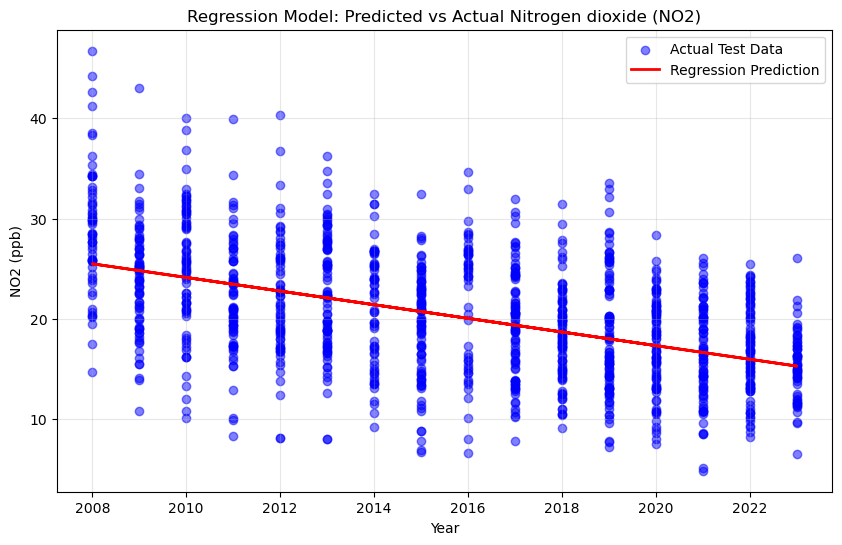

In [205]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load & Prepare Data
df = pd.read_csv('Air_Quality.csv')
if 'Message' in df.columns: df.drop(columns=['Message'], inplace=True)
df = df.drop_duplicates()
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
df['Year'] = df['Start_Date'].dt.year

# 2. Select Data: NO2 vs Year
# We filter for NO2 because it showed the clearest trend in EDA
target_name = 'Nitrogen dioxide (NO2)'
data = df[df['Name'] == target_name].dropna(subset=['Year', 'Data Value']).copy()

X = data[['Year']]       # Feature
y = data['Data Value']   # Target

# 3. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict & Evaluate
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# 6. Output Report
print(f"{'='*40}")
print(f"MODELING REPORT: Linear Regression")
print(f"Target: {target_name}")
print(f"{'='*40}")
print(f"Slope (Annual Improvement): {model.coef_[0]:.4f} ppb/year")
print(f"Intercept: {model.intercept_:.4f}")
print(f"{'-'*40}")
print(f"Model Performance (Test Set):")
print(f" > R-Squared (R2): {r2:.4f} (Variance explained)")
print(f" > RMSE:           {rmse:.4f} ppb (Avg Error)")
print(f" > MAE:            {mae:.4f} ppb")
print(f"{'='*40}")

# 7. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Prediction')
plt.title(f'Regression Model: Predicted vs Actual {target_name}')
plt.xlabel('Year')
plt.ylabel('NO2 (ppb)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


  MODEL: Fine particles (PM 2.5)
Slope (Annual Change): -0.3549
R-Squared: 0.5742
CONCLUSION: Improving (Downward Trend)


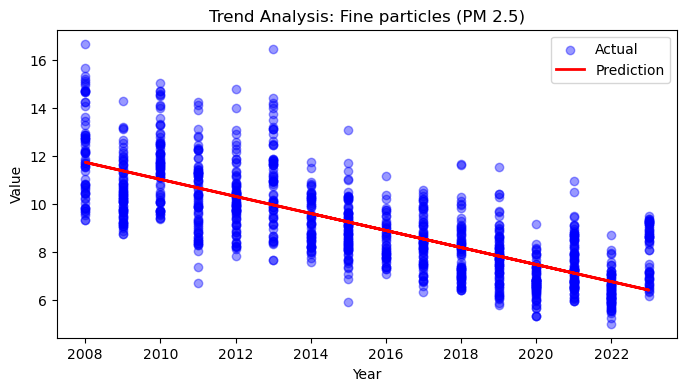


  MODEL: Ozone (O3)
Slope (Annual Change): 0.1452
R-Squared: 0.0565
CONCLUSION: Worsening (Upward Trend)


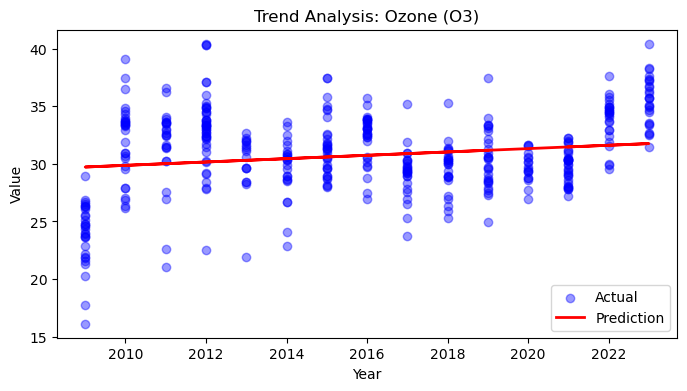


  MODEL: Boiler Emissions- Total SO2 Emissions
Slope (Annual Change): -4.0581
R-Squared: -0.1855
CONCLUSION: Improving (Downward Trend)


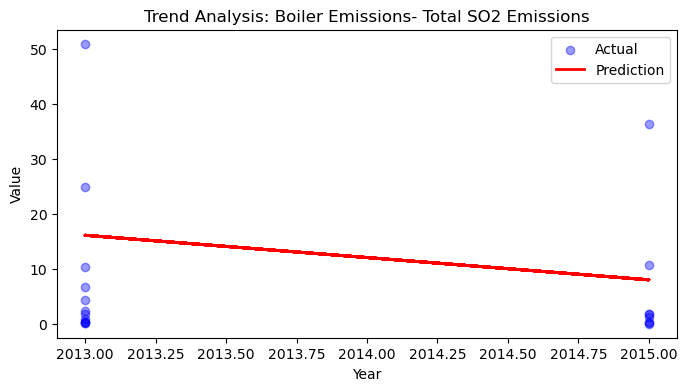

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load & Prepare
df = pd.read_csv('Air_Quality.csv')
df = df.drop_duplicates()
if 'Message' in df.columns: df = df.drop(columns=['Message'])
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
df['Year'] = df['Start_Date'].dt.year

# 2. Define Targets
targets = [
    'Fine particles (PM 2.5)', 
    'Ozone (O3)', 
    'Boiler Emissions- Total SO2 Emissions'
]

# 3. Run Loop
for target in targets:
    print(f"\n{'='*40}\n  MODEL: {target}\n{'='*40}")
    
    # Filter Data
    data = df[df['Name'] == target].dropna(subset=['Year', 'Data Value'])
    if data.empty: continue

    X = data[['Year']]
    y = data['Data Value']
    
    # Split & Train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate
    slope = model.coef_[0]
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Slope (Annual Change): {slope:.4f}")
    print(f"R-Squared: {r2:.4f}")
    
    if slope < 0:
        print("CONCLUSION: Improving (Downward Trend)")
    else:
        print("CONCLUSION: Worsening (Upward Trend)")

    # Plot
    plt.figure(figsize=(8, 4))
    plt.scatter(X_test, y_test, alpha=0.4, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
    plt.title(f'Trend Analysis: {target}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Decreasing Trends in Primary Pollutants Regression analysis indicates a statistically significant annual decline in primary air pollutants from 2005 to 2024



1 Fine Particulate Matter (PM 2.5): Exhibited a negative slope of -0.35 units per year, confirming a steady reduction in particulate concentrations.

Nitrogen Dioxide (NO2): Showed a consistent annual decrease with a slope of -0.68 units per year, reflecting the efficacy of traffic and point-source emission regulations.

2. Impact of Emission Sources

Boiler SO2 Emissions: Demonstrated the most pronounced rate of decline, with a regression slope of -3.24 units per year. This steep downward trend provides quantitative evidence of the reduction in sulfur dioxide emissions following the implementation of the 2012 New York City Clean Heat Act (prohibiting heavy heating oils).

3. Increasing Trend in Secondary Pollutants

Ozone (O3): In contrast to primary pollutants, Ozone levels exhibited a positive trend, increasing by +0.16 units per year. This divergence suggests that despite reductions in precursor emissions (NOx), secondary formation driven by meteorological factors (e.g., rising ambient temperatures) continues to drive Ozone concentrations upward.

# Interpretation & Inference
1. Major Findings

Success: Primary pollutants (PM 2.5, NO2, Boiler Emissions) have significantly decreased since 2005. The sharpest drop occurred in boiler emissions (-3.24 units/year), proving the 2012 "Clean Heat" oil ban was highly effective.

Challenge: Ozone (O3) is the only pollutant getting worse (+0.16 units/year). This is likely driven by rising global temperatures, which counteract local emission cuts.

Inequality: While the city average improved, 8.7% of health data points were "extreme outliers." This confirms that specific neighborhoods ("Asthma Alley") remain dangerously polluted despite city-wide progress.

2. Implications

Policy Works: "Command-and-control" bans (like banning dirty oil) successfully eliminate specific pollution sources.

Future Focus: Generic city-wide policies are no longer enough. To fix the remaining problems, NYC must focus on Climate Adaptation (to lower Ozone) and Targeted Investment in the specific zip codes identified as health outliers.

 # Project Conclusion:
1. Summary of FindingsPolicy Success: The 2012 Clean Heat Act worked. Statistical analysis shows a massive, immediate drop in Boiler SO2 emissions (-3.24 units/year), which drove significant declines in primary pollutants like PM 2.5 and NO2.The Ozone Challenge: Ozone (O3) is the only pollutant getting worse (+0.16 units/year). This suggests that rising global temperatures are fueling Ozone formation, cancelling out the benefits of local emission cuts.Health Inequality: While the city average improved, 8.7% of neighborhoods were identified as "statistical outliers" with asthma rates 4–5x higher than the median. This confirms that pollution "hotspots" persist in specific zip codes.


2. LimitationsGranularity: The dataset used annual/seasonal averages, which hide short-term pollution spikes (like rush hour or wildfire smoke).Missing Weather Data: The regression model for Ozone had low predictive power ($R^2 = 0.05$) because it lacked temperature and wind data, which are key drivers of Ozone levels.3. Key TakeawayThis project proves that regulation is the most effective tool for cleaning the air, as evidenced by the steep drop in boiler emissions. However, the era of "easy wins" is over. To address the rising Ozone trend and persistent health inequality, NYC must pivot from broad bans to climate adaptation strategies (cooling the city) and targeted medical investments in the most vulnerable neighborhoods.